# Predict #
To be re-inserted into main Jupyter Notebook after.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For neural networks.
import keras as kr
# For data frames.
import pandas as pd
# For numerical arrays.
import numpy as np
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec
# to write to csv file
import csv

Using TensorFlow backend.


In [2]:
# Import sklearn for comparison too
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
# Load the dataset into a dataframe
data = pd.DataFrame(data = load_boston().data, columns= load_boston().feature_names)
# Add the house price
data["MEDV"] = load_boston().target
# Quick check that all is ok
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


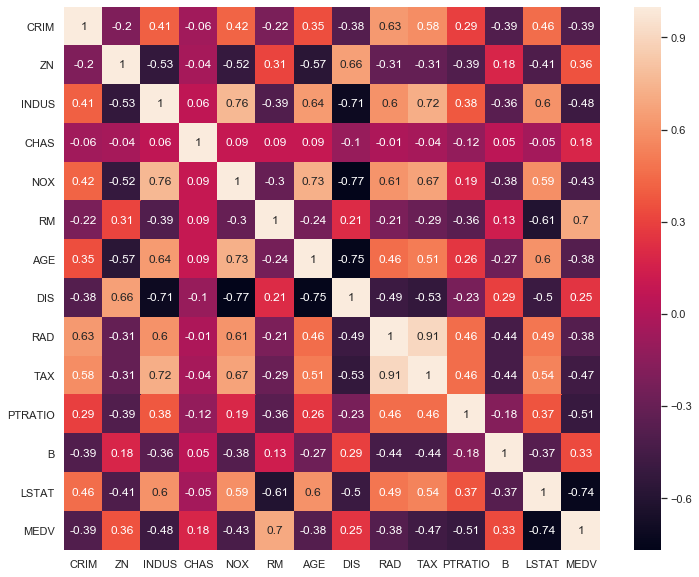

In [4]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [5]:
correlation_matrix["MEDV"]

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
MEDV       1.00
Name: MEDV, dtype: float64

In [6]:
cm = correlation_matrix.transform(func= lambda x: abs(x))["MEDV"].sort_values(ascending=False)
cm = cm.drop("MEDV",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
RAD        0.38
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

Because the TAX and RAD parameters are highly correlated (0.91) both should not be  used in training any model. As TAX has a higher correlation than RAD, the RAD feature will be dropped.

In [7]:
cm = cm.drop("RAD",axis=0)
cm

LSTAT      0.74
RM         0.70
PTRATIO    0.51
INDUS      0.48
TAX        0.47
NOX        0.43
CRIM       0.39
AGE        0.38
ZN         0.36
B          0.33
DIS        0.25
CHAS       0.18
Name: MEDV, dtype: float64

In [8]:
# Putting all possible parameters in a list in order of correlation
params = []
for i in range(0, len(cm)):
    params.append(cm.index[i])

In [9]:
y = data['MEDV'] # outputs

def getInputs(noPar):
    # Split the dataset into what we are using
    return data[params[:noPar]] # inputs

In [10]:
def scaleDS(inputs):
    # Adding a scaler
    scaler = pre.StandardScaler()
    scaler.fit(inputs)
    return scaler.transform(inputs)

In [11]:
def splitDS(inputs):
    global x_train, x_test, y_train, y_test
    # Split the dataset into training and testing
    x_train, x_test, y_train, y_test = mod.train_test_split(inputs, y, test_size=testSize)

In [12]:
def createModel(actType, optType):
    global noParams, noEpoch, batchSize
    # Create our model
    m = kr.models.Sequential()
    m.add(kr.layers.Dense(20, input_dim=noParams, activation = actType))
    m.add(kr.layers.Dense(1, activation="linear"))
    m.compile(loss = "mean_squared_error", optimizer =optType)
    # Train the network
    m.fit(x_train, y_train, epochs=noEpoch, batch_size=batchSize)
    return m

In [13]:
def doModel(model, epo, bs):
    global x_trian, x_test, y_tran, y_test, batchSize
    # Train the network
    model.fit(x_train, y_train, epochs=epo, batch_size=bs)
    # Calculate the loss function (Mean squared error in our case)
    return model.evaluate(x_test, y_test)

In [14]:
# Headings for the data
results= []

In [70]:
# Parameterise everything

# Do you want to create and test all the models? 
# If yes, set the following to true, if no, leave at false and data from previous run will be read into dataframe
yesCreateModels = True

# No of variables to include in predictions
noParams = 4 

# Test / Train Split
testSize = 0.3

# All the activations
acts = ["relu", "tanh", "sigmoid", "exponential", "elu", "linear"]
#act = acts[5]

# Optimisers
opts= ["sgd", "adam", "nadam"]
opt = opts[2]

# model trial settings
noEpoch= 100
batchSize = 10

# Whether the data should be scaled or not
scaling = False

if yesCreateModels == True:
    # Check for increasing no of attributes and all activations
    for act in acts:
        for noParams in range(1,12):
            # Create your inputs
            x = getInputs(noParams)
            # Scale if it is called for
            if scaling  == False:
                x_scaled = scaleDS(x)
            else:
                x_scaled = x
            # Split into training and testing data
            splitDS(x_scaled)
            # Create the model based on the paramters supplied
            m = createModel(act, opt)
            # Append the settings and final loss results after fitting and evaluating the model to the results file
            results.append([noParams, scaling, testSize, act, opt, noEpoch, batchSize, doModel(m, noEpoch, batchSize)])

Epoch 1/100
354/354 [==============================] - 0s 627us/step - loss: 558.6056
Epoch 2/100
354/354 [==============================] - 0s 76us/step - loss: 529.4162
Epoch 3/100
354/354 [==============================] - 0s 76us/step - loss: 488.4991
Epoch 4/100
354/354 [==============================] - 0s 79us/step - loss: 435.5700
Epoch 5/100
354/354 [==============================] - 0s 79us/step - loss: 371.9248
Epoch 6/100
354/354 [==============================] - 0s 70us/step - loss: 301.4247
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 230.9999
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 167.4200
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 115.5435
Epoch 10/100
354/354 [==============================] - 0s 76us/step - loss: 78.5600
Epoch 11/100
354/354 [==============================] - ETA: 0s - loss: 90.32 - 0s 79us/step - loss: 54.0424
Epoch 12/100
354/354 [==================

354/354 [==============================] - 0s 70us/step - loss: 28.1499
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 28.1422
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 28.1434
Epoch 99/100
354/354 [==============================] - 0s 68us/step - loss: 28.1673
Epoch 100/100
354/354 [==============================] - 0s 68us/step - loss: 28.1679
Epoch 1/100
354/354 [==============================] - 0s 75us/step - loss: 28.0962
Epoch 2/100
354/354 [==============================] - 0s 68us/step - loss: 28.0409
Epoch 3/100
354/354 [==============================] - 0s 70us/step - loss: 28.0492
Epoch 4/100
354/354 [==============================] - 0s 65us/step - loss: 28.0189
Epoch 5/100
354/354 [==============================] - 0s 70us/step - loss: 28.0171
Epoch 6/100
354/354 [==============================] - 0s 68us/step - loss: 28.0390
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 28.0525

354/354 [==============================] - 0s 68us/step - loss: 27.0475
Epoch 93/100
354/354 [==============================] - 0s 73us/step - loss: 27.0304
Epoch 94/100
354/354 [==============================] - 0s 73us/step - loss: 27.0763
Epoch 95/100
354/354 [==============================] - 0s 68us/step - loss: 27.0479
Epoch 96/100
354/354 [==============================] - 0s 68us/step - loss: 27.0233
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 27.0988
Epoch 98/100
354/354 [==============================] - 0s 71us/step - loss: 26.9769
Epoch 99/100
354/354 [==============================] - 0s 65us/step - loss: 26.9951
Epoch 100/100
152/152 [==============================] - 0s 157us/step
Epoch 1/100
354/354 [==============================] - 0s 606us/step - loss: 564.0620
Epoch 2/100
354/354 [==============================] - 0s 59us/step - loss: 535.8649
Epoch 3/100
354/354 [==============================] - 0s 62us/step - loss: 497.4875
Epoch 

354/354 [==============================] - 0s 68us/step - loss: 14.3728
Epoch 88/100
354/354 [==============================] - 0s 65us/step - loss: 14.2422
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 14.2210
Epoch 90/100
354/354 [==============================] - 0s 73us/step - loss: 14.2306
Epoch 91/100
354/354 [==============================] - 0s 71us/step - loss: 14.2167
Epoch 92/100
354/354 [==============================] - 0s 65us/step - loss: 14.1870
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 14.1351
Epoch 94/100
354/354 [==============================] - 0s 70us/step - loss: 14.1289
Epoch 95/100
354/354 [==============================] - 0s 65us/step - loss: 14.1003
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 14.0719
Epoch 97/100
354/354 [==============================] - 0s 68us/step - loss: 14.1318
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 13.3977
Epoch 84/100
354/354 [==============================] - 0s 73us/step - loss: 13.3864
Epoch 85/100
354/354 [==============================] - 0s 70us/step - loss: 13.3992
Epoch 86/100
354/354 [==============================] - 0s 70us/step - loss: 13.3263
Epoch 87/100
354/354 [==============================] - 0s 68us/step - loss: 13.3212
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 13.3258
Epoch 89/100
354/354 [==============================] - 0s 68us/step - loss: 13.3379
Epoch 90/100
354/354 [==============================] - 0s 76us/step - loss: 13.3449
Epoch 91/100
354/354 [==============================] - 0s 65us/step - loss: 13.3809
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 13.3393
Epoch 93/100
354/354 [==============================] - 0s 69us/step - loss: 13.3178
Epoch 94/100
354/354 [==============================] - 0s 71us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 20.4226
Epoch 79/100
354/354 [==============================] - 0s 68us/step - loss: 20.4257
Epoch 80/100
354/354 [==============================] - 0s 70us/step - loss: 20.3875
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 20.3577
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 20.3564
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 20.2656
Epoch 84/100
354/354 [==============================] - 0s 71us/step - loss: 20.2877
Epoch 85/100
354/354 [==============================] - 0s 68us/step - loss: 20.2497
Epoch 86/100
354/354 [==============================] - 0s 68us/step - loss: 20.2068
Epoch 87/100
354/354 [==============================] - 0s 68us/step - loss: 20.2132
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 20.2688
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 71us/step - loss: 18.8044
Epoch 75/100
354/354 [==============================] - 0s 76us/step - loss: 18.7852
Epoch 76/100
354/354 [==============================] - 0s 70us/step - loss: 18.8985
Epoch 77/100
354/354 [==============================] - 0s 70us/step - loss: 18.7886
Epoch 78/100
354/354 [==============================] - 0s 73us/step - loss: 18.8302
Epoch 79/100
354/354 [==============================] - 0s 70us/step - loss: 18.8095
Epoch 80/100
354/354 [==============================] - 0s 70us/step - loss: 18.7355
Epoch 81/100
354/354 [==============================] - 0s 70us/step - loss: 18.7591
Epoch 82/100
354/354 [==============================] - 0s 73us/step - loss: 18.7886
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 18.7722
Epoch 84/100
354/354 [==============================] - 0s 68us/step - loss: 18.8341
Epoch 85/100
354/354 [==============================] - 0s 69us/step - loss: 1

354/354 [==============================] - 0s 71us/step - loss: 19.5718
Epoch 69/100
354/354 [==============================] - 0s 70us/step - loss: 19.5074
Epoch 70/100
354/354 [==============================] - 0s 68us/step - loss: 19.4567
Epoch 71/100
354/354 [==============================] - 0s 65us/step - loss: 19.3507
Epoch 72/100
354/354 [==============================] - 0s 68us/step - loss: 19.2927
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 19.2661
Epoch 74/100
354/354 [==============================] - 0s 65us/step - loss: 19.2189
Epoch 75/100
354/354 [==============================] - 0s 68us/step - loss: 19.1336
Epoch 76/100
354/354 [==============================] - 0s 68us/step - loss: 19.0979
Epoch 77/100
354/354 [==============================] - 0s 68us/step - loss: 19.0048
Epoch 78/100
354/354 [==============================] - 0s 62us/step - loss: 19.0367
Epoch 79/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 15.5299
Epoch 64/100
354/354 [==============================] - 0s 65us/step - loss: 15.4375
Epoch 65/100
354/354 [==============================] - 0s 70us/step - loss: 15.4905
Epoch 66/100
354/354 [==============================] - 0s 82us/step - loss: 15.4469
Epoch 67/100
354/354 [==============================] - 0s 68us/step - loss: 15.4246
Epoch 68/100
354/354 [==============================] - 0s 68us/step - loss: 15.3803
Epoch 69/100
354/354 [==============================] - 0s 68us/step - loss: 15.4429
Epoch 70/100
354/354 [==============================] - 0s 65us/step - loss: 15.3759
Epoch 71/100
354/354 [==============================] - 0s 62us/step - loss: 15.3294
Epoch 72/100
354/354 [==============================] - 0s 65us/step - loss: 15.3075
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 15.3367
Epoch 74/100
354/354 [==============================] - 0s 65us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 15.5945
Epoch 59/100
354/354 [==============================] - 0s 73us/step - loss: 15.4083
Epoch 60/100
354/354 [==============================] - 0s 70us/step - loss: 15.2623
Epoch 61/100
354/354 [==============================] - 0s 70us/step - loss: 15.1288
Epoch 62/100
354/354 [==============================] - 0s 68us/step - loss: 15.0512
Epoch 63/100
354/354 [==============================] - 0s 68us/step - loss: 14.8912
Epoch 64/100
354/354 [==============================] - 0s 68us/step - loss: 14.8424
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 14.7411
Epoch 66/100
354/354 [==============================] - 0s 65us/step - loss: 14.5929
Epoch 67/100
354/354 [==============================] - 0s 65us/step - loss: 14.5741
Epoch 68/100
354/354 [==============================] - 0s 68us/step - loss: 14.4310
Epoch 69/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 11.6305
Epoch 55/100
354/354 [==============================] - 0s 70us/step - loss: 11.5722
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 11.6283
Epoch 57/100
354/354 [==============================] - ETA: 0s - loss: 5.116 - 0s 68us/step - loss: 11.5760
Epoch 58/100
354/354 [==============================] - 0s 70us/step - loss: 11.5712
Epoch 59/100
354/354 [==============================] - 0s 68us/step - loss: 11.5612
Epoch 60/100
354/354 [==============================] - 0s 70us/step - loss: 11.5342
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 11.5010
Epoch 62/100
354/354 [==============================] - 0s 68us/step - loss: 11.4826
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 11.4317
Epoch 64/100
354/354 [==============================] - 0s 65us/step - loss: 11.5240
Epoch 65/100
354/354 [==============================] 

354/354 [==============================] - 0s 68us/step - loss: 20.3947
Epoch 50/100
354/354 [==============================] - 0s 69us/step - loss: 20.2120
Epoch 51/100
354/354 [==============================] - 0s 68us/step - loss: 19.9735
Epoch 52/100
354/354 [==============================] - 0s 65us/step - loss: 19.7803
Epoch 53/100
354/354 [==============================] - 0s 65us/step - loss: 19.5587
Epoch 54/100
354/354 [==============================] - 0s 68us/step - loss: 19.4158
Epoch 55/100
354/354 [==============================] - 0s 71us/step - loss: 19.2876
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 19.0034
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 18.8490
Epoch 58/100
354/354 [==============================] - 0s 69us/step - loss: 18.7032
Epoch 59/100
354/354 [==============================] - 0s 68us/step - loss: 18.5053
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 65us/step - loss: 12.3509
Epoch 46/100
354/354 [==============================] - 0s 70us/step - loss: 12.3116
Epoch 47/100
354/354 [==============================] - 0s 68us/step - loss: 12.3242
Epoch 48/100
354/354 [==============================] - 0s 68us/step - loss: 12.2723
Epoch 49/100
354/354 [==============================] - 0s 65us/step - loss: 12.1478
Epoch 50/100
354/354 [==============================] - 0s 65us/step - loss: 12.2273
Epoch 51/100
354/354 [==============================] - 0s 70us/step - loss: 12.0693
Epoch 52/100
354/354 [==============================] - 0s 68us/step - loss: 12.1344
Epoch 53/100
354/354 [==============================] - 0s 68us/step - loss: 12.0657
Epoch 54/100
354/354 [==============================] - 0s 73us/step - loss: 12.0359
Epoch 55/100
354/354 [==============================] - 0s 65us/step - loss: 11.9809
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 1

Epoch 40/100
354/354 [==============================] - 0s 82us/step - loss: 19.4289
Epoch 41/100
354/354 [==============================] - 0s 85us/step - loss: 19.1571
Epoch 42/100
354/354 [==============================] - 0s 75us/step - loss: 18.9085
Epoch 43/100
354/354 [==============================] - 0s 76us/step - loss: 18.7487
Epoch 44/100
354/354 [==============================] - 0s 79us/step - loss: 18.4711
Epoch 45/100
354/354 [==============================] - 0s 73us/step - loss: 18.3087
Epoch 46/100
354/354 [==============================] - 0s 76us/step - loss: 18.1120
Epoch 47/100
354/354 [==============================] - 0s 73us/step - loss: 17.9828
Epoch 48/100
354/354 [==============================] - 0s 76us/step - loss: 17.7177
Epoch 49/100
354/354 [==============================] - 0s 76us/step - loss: 17.4967
Epoch 50/100
354/354 [==============================] - 0s 93us/step - loss: 17.3565
Epoch 51/100
354/354 [==============================] - 0s 90us/s

354/354 [==============================] - 0s 68us/step - loss: 12.6040
Epoch 37/100
354/354 [==============================] - 0s 76us/step - loss: 12.5206
Epoch 38/100
354/354 [==============================] - 0s 76us/step - loss: 12.4911
Epoch 39/100
354/354 [==============================] - 0s 76us/step - loss: 12.4388
Epoch 40/100
354/354 [==============================] - 0s 75us/step - loss: 12.4306
Epoch 41/100
354/354 [==============================] - 0s 82us/step - loss: 12.4159
Epoch 42/100
354/354 [==============================] - 0s 76us/step - loss: 12.3894
Epoch 43/100
354/354 [==============================] - 0s 76us/step - loss: 12.3596
Epoch 44/100
354/354 [==============================] - 0s 73us/step - loss: 12.3476
Epoch 45/100
354/354 [==============================] - 0s 73us/step - loss: 12.2464
Epoch 46/100
354/354 [==============================] - 0s 68us/step - loss: 12.2338
Epoch 47/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 22.8835
Epoch 32/100
354/354 [==============================] - 0s 85us/step - loss: 22.2852
Epoch 33/100
354/354 [==============================] - 0s 68us/step - loss: 21.8262
Epoch 34/100
354/354 [==============================] - 0s 65us/step - loss: 21.3424
Epoch 35/100
354/354 [==============================] - 0s 68us/step - loss: 20.9176
Epoch 36/100
354/354 [==============================] - 0s 65us/step - loss: 20.4399
Epoch 37/100
354/354 [==============================] - 0s 64us/step - loss: 20.0643
Epoch 38/100
354/354 [==============================] - 0s 65us/step - loss: 19.6530
Epoch 39/100
354/354 [==============================] - 0s 79us/step - loss: 19.2676
Epoch 40/100
354/354 [==============================] - 0s 70us/step - loss: 18.9015
Epoch 41/100
354/354 [==============================] - 0s 73us/step - loss: 18.5573
Epoch 42/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 101us/step - loss: 9.9127
Epoch 28/100
354/354 [==============================] - 0s 104us/step - loss: 9.8245
Epoch 29/100
354/354 [==============================] - 0s 90us/step - loss: 9.7844
Epoch 30/100
354/354 [==============================] - 0s 116us/step - loss: 9.7880
Epoch 31/100
354/354 [==============================] - 0s 110us/step - loss: 9.7652
Epoch 32/100
354/354 [==============================] - 0s 99us/step - loss: 9.6930
Epoch 33/100
354/354 [==============================] - 0s 70us/step - loss: 9.6517
Epoch 34/100
354/354 [==============================] - 0s 70us/step - loss: 9.6326
Epoch 35/100
354/354 [==============================] - 0s 93us/step - loss: 9.5734
Epoch 36/100
354/354 [==============================] - 0s 73us/step - loss: 9.6250
Epoch 37/100
354/354 [==============================] - 0s 127us/step - loss: 9.5013
Epoch 38/100
354/354 [==============================] - 0s 104us/step - loss: 9.5847

354/354 [==============================] - 0s 76us/step - loss: 27.5110
Epoch 24/100
354/354 [==============================] - 0s 90us/step - loss: 26.7125
Epoch 25/100
354/354 [==============================] - 0s 110us/step - loss: 25.8105
Epoch 26/100
354/354 [==============================] - 0s 96us/step - loss: 25.0183
Epoch 27/100
354/354 [==============================] - 0s 96us/step - loss: 24.3731
Epoch 28/100
354/354 [==============================] - 0s 96us/step - loss: 23.7173
Epoch 29/100
354/354 [==============================] - 0s 93us/step - loss: 23.1244
Epoch 30/100
354/354 [==============================] - 0s 141us/step - loss: 22.5378
Epoch 31/100
354/354 [==============================] - 0s 149us/step - loss: 22.0033
Epoch 32/100
354/354 [==============================] - 0s 146us/step - loss: 21.4682
Epoch 33/100
354/354 [==============================] - 0s 97us/step - loss: 20.9914
Epoch 34/100
354/354 [==============================] - 0s 127us/step - lo

354/354 [==============================] - 0s 76us/step - loss: 11.4866
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 11.5414
Epoch 21/100
354/354 [==============================] - 0s 73us/step - loss: 11.4565
Epoch 22/100
354/354 [==============================] - 0s 76us/step - loss: 11.4190
Epoch 23/100
354/354 [==============================] - 0s 96us/step - loss: 11.4162
Epoch 24/100
354/354 [==============================] - 0s 90us/step - loss: 11.3624
Epoch 25/100
354/354 [==============================] - 0s 87us/step - loss: 11.2973
Epoch 26/100
354/354 [==============================] - 0s 84us/step - loss: 11.3104
Epoch 27/100
354/354 [==============================] - 0s 82us/step - loss: 11.3026
Epoch 28/100
354/354 [==============================] - 0s 90us/step - loss: 11.1739
Epoch 29/100
354/354 [==============================] - 0s 87us/step - loss: 11.1757
Epoch 30/100
354/354 [==============================] - 0s 85us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 45.0492
Epoch 15/100
354/354 [==============================] - 0s 79us/step - loss: 40.2114
Epoch 16/100
354/354 [==============================] - 0s 82us/step - loss: 36.8310
Epoch 17/100
354/354 [==============================] - 0s 73us/step - loss: 34.2707
Epoch 18/100
354/354 [==============================] - 0s 73us/step - loss: 32.3470
Epoch 19/100
354/354 [==============================] - 0s 73us/step - loss: 30.9394
Epoch 20/100
354/354 [==============================] - 0s 79us/step - loss: 29.8747
Epoch 21/100
354/354 [==============================] - 0s 73us/step - loss: 29.0341
Epoch 22/100
354/354 [==============================] - 0s 70us/step - loss: 28.2793
Epoch 23/100
354/354 [==============================] - 0s 82us/step - loss: 27.6968
Epoch 24/100
354/354 [==============================] - 0s 79us/step - loss: 27.1118
Epoch 25/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 101us/step - loss: 12.2985
Epoch 11/100
354/354 [==============================] - 0s 93us/step - loss: 12.0514
Epoch 12/100
354/354 [==============================] - 0s 101us/step - loss: 12.0196
Epoch 13/100
354/354 [==============================] - 0s 107us/step - loss: 12.0169
Epoch 14/100
354/354 [==============================] - 0s 124us/step - loss: 11.9049
Epoch 15/100
354/354 [==============================] - 0s 127us/step - loss: 11.7861
Epoch 16/100
354/354 [==============================] - 0s 118us/step - loss: 11.7257
Epoch 17/100
354/354 [==============================] - 0s 124us/step - loss: 11.6595
Epoch 18/100
354/354 [==============================] - 0s 127us/step - loss: 11.5881
Epoch 19/100
354/354 [==============================] - 0s 110us/step - loss: 11.5628
Epoch 20/100
354/354 [==============================] - 0s 96us/step - loss: 11.5186
Epoch 21/100
354/354 [==============================] - 0s 79us/step 

354/354 [==============================] - 0s 87us/step - loss: 329.9885
Epoch 6/100
354/354 [==============================] - 0s 82us/step - loss: 234.4124
Epoch 7/100
354/354 [==============================] - 0s 82us/step - loss: 158.4149
Epoch 8/100
354/354 [==============================] - 0s 87us/step - loss: 107.9204
Epoch 9/100
354/354 [==============================] - 0s 113us/step - loss: 77.8259
Epoch 10/100
354/354 [==============================] - 0s 101us/step - loss: 59.5573
Epoch 11/100
354/354 [==============================] - 0s 96us/step - loss: 48.3946
Epoch 12/100
354/354 [==============================] - 0s 107us/step - loss: 41.1738
Epoch 13/100
354/354 [==============================] - 0s 99us/step - loss: 36.6487
Epoch 14/100
354/354 [==============================] - 0s 101us/step - loss: 33.5638
Epoch 15/100
354/354 [==============================] - 0s 107us/step - loss: 31.4251
Epoch 16/100
354/354 [==============================] - 0s 104us/step - l

354/354 [==============================] - 0s 90us/step - loss: 8.3052
Epoch 2/100
354/354 [==============================] - 0s 90us/step - loss: 8.3098
Epoch 3/100
354/354 [==============================] - 0s 90us/step - loss: 8.2435
Epoch 4/100
354/354 [==============================] - 0s 87us/step - loss: 8.2233
Epoch 5/100
354/354 [==============================] - 0s 90us/step - loss: 8.2520
Epoch 6/100
354/354 [==============================] - 0s 93us/step - loss: 8.2421
Epoch 7/100
354/354 [==============================] - 0s 87us/step - loss: 8.1352
Epoch 8/100
354/354 [==============================] - 0s 85us/step - loss: 8.1165
Epoch 9/100
354/354 [==============================] - 0s 87us/step - loss: 8.1009
Epoch 10/100
354/354 [==============================] - 0s 85us/step - loss: 8.0353
Epoch 11/100
354/354 [==============================] - 0s 79us/step - loss: 8.0111
Epoch 12/100
354/354 [==============================] - 0s 90us/step - loss: 7.9340
Epoch 13/100


354/354 [==============================] - 0s 79us/step - loss: 6.5052
Epoch 99/100
354/354 [==============================] - 0s 76us/step - loss: 6.5286
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Epoch 1/100
354/354 [==============================] - 0s 689us/step - loss: 555.9857
Epoch 2/100
354/354 [==============================] - 0s 62us/step - loss: 528.9435
Epoch 3/100
354/354 [==============================] - 0s 65us/step - loss: 492.7500
Epoch 4/100
354/354 [==============================] - 0s 68us/step - loss: 446.6573
Epoch 5/100
354/354 [==============================] - 0s 70us/step - loss: 393.0145
Epoch 6/100
354/354 [==============================] - 0s 76us/step - loss: 337.1086
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 282.6927
Epoch 8/100
354/354 [==============================] - 0s 85us/step - loss: 232.5566
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 188.7248
Epoch 10

354/354 [==============================] - 0s 113us/step - loss: 31.3500
Epoch 94/100
354/354 [==============================] - 0s 82us/step - loss: 31.2886
Epoch 95/100
354/354 [==============================] - 0s 93us/step - loss: 31.1656
Epoch 96/100
354/354 [==============================] - 0s 84us/step - loss: 31.0789
Epoch 97/100
354/354 [==============================] - 0s 82us/step - loss: 30.9832
Epoch 98/100
354/354 [==============================] - 0s 79us/step - loss: 30.9346
Epoch 99/100
354/354 [==============================] - 0s 87us/step - loss: 30.8649
Epoch 100/100
354/354 [==============================] - 0s 81us/step - loss: 30.7758
Epoch 1/100
354/354 [==============================] - 0s 87us/step - loss: 30.7569
Epoch 2/100
354/354 [==============================] - 0s 96us/step - loss: 30.6395
Epoch 3/100
354/354 [==============================] - 0s 107us/step - loss: 30.4909
Epoch 4/100
354/354 [==============================] - 0s 113us/step - loss: 3

354/354 [==============================] - 0s 85us/step - loss: 27.8996
Epoch 90/100
354/354 [==============================] - 0s 85us/step - loss: 27.8144
Epoch 91/100
354/354 [==============================] - 0s 79us/step - loss: 27.7919
Epoch 92/100
354/354 [==============================] - 0s 87us/step - loss: 27.7626
Epoch 93/100
354/354 [==============================] - 0s 82us/step - loss: 27.7787
Epoch 94/100
354/354 [==============================] - 0s 76us/step - loss: 27.7163
Epoch 95/100
354/354 [==============================] - 0s 82us/step - loss: 27.7491
Epoch 96/100
354/354 [==============================] - 0s 82us/step - loss: 27.7406
Epoch 97/100
354/354 [==============================] - 0s 79us/step - loss: 27.6966
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 27.6443
Epoch 99/100
354/354 [==============================] - 0s 79us/step - loss: 27.7053
Epoch 100/100
152/152 [==============================] - 0s 177us/step
Epoch 1

354/354 [==============================] - 0s 76us/step - loss: 28.1824
Epoch 85/100
354/354 [==============================] - 0s 79us/step - loss: 27.8294
Epoch 86/100
354/354 [==============================] - 0s 82us/step - loss: 27.5834
Epoch 87/100
354/354 [==============================] - 0s 82us/step - loss: 27.2488
Epoch 88/100
354/354 [==============================] - 0s 82us/step - loss: 26.9526
Epoch 89/100
354/354 [==============================] - 0s 79us/step - loss: 26.6585
Epoch 90/100
354/354 [==============================] - 0s 82us/step - loss: 26.3653
Epoch 91/100
354/354 [==============================] - 0s 93us/step - loss: 26.0222
Epoch 92/100
354/354 [==============================] - 0s 79us/step - loss: 25.8104
Epoch 93/100
354/354 [==============================] - 0s 85us/step - loss: 25.4980
Epoch 94/100
354/354 [==============================] - 0s 79us/step - loss: 25.2580
Epoch 95/100
354/354 [==============================] - 0s 76us/step - loss: 2

354/354 [==============================] - 0s 79us/step - loss: 17.8213
Epoch 81/100
354/354 [==============================] - 0s 90us/step - loss: 17.7500
Epoch 82/100
354/354 [==============================] - 0s 107us/step - loss: 17.7120
Epoch 83/100
354/354 [==============================] - 0s 104us/step - loss: 17.7334
Epoch 84/100
354/354 [==============================] - 0s 110us/step - loss: 17.7300
Epoch 85/100
354/354 [==============================] - 0s 110us/step - loss: 17.7016
Epoch 86/100
354/354 [==============================] - 0s 101us/step - loss: 17.7237
Epoch 87/100
354/354 [==============================] - 0s 101us/step - loss: 17.6820
Epoch 88/100
354/354 [==============================] - 0s 85us/step - loss: 17.6629
Epoch 89/100
354/354 [==============================] - 0s 82us/step - loss: 17.6241
Epoch 90/100
354/354 [==============================] - 0s 84us/step - loss: 17.6374
Epoch 91/100
354/354 [==============================] - 0s 82us/step - l

354/354 [==============================] - 0s 87us/step - loss: 23.5346
Epoch 76/100
354/354 [==============================] - 0s 82us/step - loss: 23.2860
Epoch 77/100
354/354 [==============================] - 0s 79us/step - loss: 23.1513
Epoch 78/100
354/354 [==============================] - 0s 82us/step - loss: 22.9525
Epoch 79/100
354/354 [==============================] - 0s 76us/step - loss: 22.6748
Epoch 80/100
354/354 [==============================] - 0s 87us/step - loss: 22.4517
Epoch 81/100
354/354 [==============================] - 0s 82us/step - loss: 22.2895
Epoch 82/100
354/354 [==============================] - 0s 75us/step - loss: 22.0553
Epoch 83/100
354/354 [==============================] - 0s 79us/step - loss: 21.8265
Epoch 84/100
354/354 [==============================] - 0s 90us/step - loss: 21.6844
Epoch 85/100
354/354 [==============================] - 0s 82us/step - loss: 21.4430
Epoch 86/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 14.7390
Epoch 71/100
354/354 [==============================] - 0s 79us/step - loss: 14.7549
Epoch 72/100
354/354 [==============================] - 0s 76us/step - loss: 14.7565
Epoch 73/100
354/354 [==============================] - 0s 76us/step - loss: 14.7430
Epoch 74/100
354/354 [==============================] - 0s 76us/step - loss: 14.7079
Epoch 75/100
354/354 [==============================] - 0s 76us/step - loss: 14.6725
Epoch 76/100
354/354 [==============================] - 0s 73us/step - loss: 14.6590
Epoch 77/100
354/354 [==============================] - 0s 79us/step - loss: 14.6818
Epoch 78/100
354/354 [==============================] - 0s 76us/step - loss: 14.6613
Epoch 79/100
354/354 [==============================] - 0s 76us/step - loss: 14.6052
Epoch 80/100
354/354 [==============================] - 0s 79us/step - loss: 14.6118
Epoch 81/100
354/354 [==============================] - 0s 78us/step - loss: 1

354/354 [==============================] - 0s 110us/step - loss: 31.0034
Epoch 66/100
354/354 [==============================] - 0s 99us/step - loss: 30.7137
Epoch 67/100
354/354 [==============================] - 0s 96us/step - loss: 30.5348
Epoch 68/100
354/354 [==============================] - 0s 99us/step - loss: 30.3453
Epoch 69/100
354/354 [==============================] - 0s 107us/step - loss: 30.2177
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 29.9347
Epoch 71/100
354/354 [==============================] - 0s 85us/step - loss: 29.8312
Epoch 72/100
354/354 [==============================] - 0s 96us/step - loss: 29.6571
Epoch 73/100
354/354 [==============================] - 0s 99us/step - loss: 29.4030
Epoch 74/100
354/354 [==============================] - 0s 93us/step - loss: 29.2361
Epoch 75/100
354/354 [==============================] - 0s 82us/step - loss: 29.0982
Epoch 76/100
354/354 [==============================] - 0s 93us/step - loss:

354/354 [==============================] - 0s 73us/step - loss: 15.7500
Epoch 62/100
354/354 [==============================] - 0s 73us/step - loss: 15.6811
Epoch 63/100
354/354 [==============================] - 0s 73us/step - loss: 15.6508
Epoch 64/100
354/354 [==============================] - ETA: 0s - loss: 6.345 - 0s 73us/step - loss: 15.6284
Epoch 65/100
354/354 [==============================] - 0s 70us/step - loss: 15.6197
Epoch 66/100
354/354 [==============================] - 0s 70us/step - loss: 15.5613
Epoch 67/100
354/354 [==============================] - 0s 93us/step - loss: 15.4690
Epoch 68/100
354/354 [==============================] - 0s 93us/step - loss: 15.4450
Epoch 69/100
354/354 [==============================] - 0s 93us/step - loss: 15.3420
Epoch 70/100
354/354 [==============================] - 0s 96us/step - loss: 15.2956
Epoch 71/100
354/354 [==============================] - 0s 87us/step - loss: 15.2826
Epoch 72/100
354/354 [==============================] 

354/354 [==============================] - 0s 73us/step - loss: 32.1238
Epoch 57/100
354/354 [==============================] - 0s 73us/step - loss: 31.8425
Epoch 58/100
354/354 [==============================] - 0s 65us/step - loss: 31.5566
Epoch 59/100
354/354 [==============================] - 0s 68us/step - loss: 31.2245
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 30.9455
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 30.6226
Epoch 62/100
354/354 [==============================] - 0s 68us/step - loss: 30.4453
Epoch 63/100
354/354 [==============================] - 0s 68us/step - loss: 30.1421
Epoch 64/100
354/354 [==============================] - 0s 70us/step - loss: 29.8214
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 29.5775
Epoch 66/100
354/354 [==============================] - 0s 65us/step - loss: 29.3516
Epoch 67/100
354/354 [==============================] - 0s 65us/step - loss: 2

Epoch 52/100
354/354 [==============================] - 0s 76us/step - loss: 15.9463
Epoch 53/100
354/354 [==============================] - 0s 76us/step - loss: 15.8672
Epoch 54/100
354/354 [==============================] - 0s 70us/step - loss: 15.7081
Epoch 55/100
354/354 [==============================] - 0s 73us/step - loss: 15.6291
Epoch 56/100
354/354 [==============================] - 0s 76us/step - loss: 15.6145
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 15.5981
Epoch 58/100
354/354 [==============================] - 0s 85us/step - loss: 15.5747
Epoch 59/100
354/354 [==============================] - 0s 90us/step - loss: 15.4809
Epoch 60/100
354/354 [==============================] - 0s 99us/step - loss: 15.3882
Epoch 61/100
354/354 [==============================] - 0s 99us/step - loss: 15.3513
Epoch 62/100
354/354 [==============================] - 0s 121us/step - loss: 15.3153
Epoch 63/100
354/354 [==============================] - 0s 96us/

354/354 [==============================] - 0s 70us/step - loss: 32.5594
Epoch 47/100
354/354 [==============================] - 0s 76us/step - loss: 32.0538
Epoch 48/100
354/354 [==============================] - 0s 70us/step - loss: 31.5983
Epoch 49/100
354/354 [==============================] - 0s 68us/step - loss: 31.1342
Epoch 50/100
354/354 [==============================] - 0s 68us/step - loss: 30.6939
Epoch 51/100
354/354 [==============================] - 0s 73us/step - loss: 30.2623
Epoch 52/100
354/354 [==============================] - 0s 80us/step - loss: 29.8153
Epoch 53/100
354/354 [==============================] - 0s 73us/step - loss: 29.4088
Epoch 54/100
354/354 [==============================] - 0s 76us/step - loss: 29.0162
Epoch 55/100
354/354 [==============================] - 0s 76us/step - loss: 28.5751
Epoch 56/100
354/354 [==============================] - 0s 75us/step - loss: 28.2158
Epoch 57/100
354/354 [==============================] - 0s 79us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 13.8363
Epoch 43/100
354/354 [==============================] - 0s 70us/step - loss: 13.7410
Epoch 44/100
354/354 [==============================] - 0s 68us/step - loss: 13.7000
Epoch 45/100
354/354 [==============================] - 0s 70us/step - loss: 13.6168
Epoch 46/100
354/354 [==============================] - 0s 68us/step - loss: 13.5698
Epoch 47/100
354/354 [==============================] - 0s 70us/step - loss: 13.5505
Epoch 48/100
354/354 [==============================] - 0s 68us/step - loss: 13.4964
Epoch 49/100
354/354 [==============================] - 0s 82us/step - loss: 13.3967
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 13.3278
Epoch 51/100
354/354 [==============================] - 0s 73us/step - loss: 13.2871
Epoch 52/100
354/354 [==============================] - 0s 75us/step - loss: 13.3250
Epoch 53/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 115us/step - loss: 37.9359
Epoch 38/100
354/354 [==============================] - 0s 124us/step - loss: 37.4331
Epoch 39/100
354/354 [==============================] - 0s 110us/step - loss: 36.9726
Epoch 40/100
354/354 [==============================] - 0s 99us/step - loss: 36.4788
Epoch 41/100
354/354 [==============================] - 0s 79us/step - loss: 35.9179
Epoch 42/100
354/354 [==============================] - 0s 82us/step - loss: 35.4250
Epoch 43/100
354/354 [==============================] - 0s 163us/step - loss: 34.8942
Epoch 44/100
354/354 [==============================] - 0s 110us/step - loss: 34.3834
Epoch 45/100
354/354 [==============================] - 0s 99us/step - loss: 33.8067
Epoch 46/100
354/354 [==============================] - 0s 103us/step - loss: 33.2788
Epoch 47/100
354/354 [==============================] - 0s 107us/step - loss: 32.8111
Epoch 48/100
354/354 [==============================] - 0s 104us/step -

354/354 [==============================] - 0s 121us/step - loss: 13.8754
Epoch 34/100
354/354 [==============================] - 0s 96us/step - loss: 13.8162
Epoch 35/100
354/354 [==============================] - 0s 96us/step - loss: 13.6972
Epoch 36/100
354/354 [==============================] - 0s 95us/step - loss: 13.6506
Epoch 37/100
354/354 [==============================] - 0s 90us/step - loss: 13.5885
Epoch 38/100
354/354 [==============================] - 0s 93us/step - loss: 13.5058
Epoch 39/100
354/354 [==============================] - 0s 121us/step - loss: 13.4495
Epoch 40/100
354/354 [==============================] - 0s 124us/step - loss: 13.3563
Epoch 41/100
354/354 [==============================] - 0s 141us/step - loss: 13.3872
Epoch 42/100
354/354 [==============================] - 0s 127us/step - loss: 13.3098
Epoch 43/100
354/354 [==============================] - 0s 132us/step - loss: 13.3536
Epoch 44/100
354/354 [==============================] - 0s 163us/step - 

354/354 [==============================] - 0s 70us/step - loss: 43.2210
Epoch 29/100
354/354 [==============================] - 0s 76us/step - loss: 42.3982
Epoch 30/100
354/354 [==============================] - 0s 79us/step - loss: 41.7633
Epoch 31/100
354/354 [==============================] - 0s 87us/step - loss: 40.9664
Epoch 32/100
354/354 [==============================] - 0s 76us/step - loss: 40.2190
Epoch 33/100
354/354 [==============================] - 0s 82us/step - loss: 39.5544
Epoch 34/100
354/354 [==============================] - 0s 79us/step - loss: 38.8682
Epoch 35/100
354/354 [==============================] - 0s 70us/step - loss: 38.1610
Epoch 36/100
354/354 [==============================] - 0s 76us/step - loss: 37.5161
Epoch 37/100
354/354 [==============================] - 0s 82us/step - loss: 36.9104
Epoch 38/100
354/354 [==============================] - 0s 70us/step - loss: 36.1898
Epoch 39/100
354/354 [==============================] - 0s 76us/step - loss: 3

354/354 [==============================] - 0s 70us/step - loss: 14.2504
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 14.0619
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 13.9913
Epoch 27/100
354/354 [==============================] - 0s 71us/step - loss: 13.9179
Epoch 28/100
354/354 [==============================] - 0s 73us/step - loss: 13.8510
Epoch 29/100
354/354 [==============================] - 0s 71us/step - loss: 13.6395
Epoch 30/100
354/354 [==============================] - 0s 82us/step - loss: 13.5712
Epoch 31/100
354/354 [==============================] - 0s 68us/step - loss: 13.4967
Epoch 32/100
354/354 [==============================] - 0s 68us/step - loss: 13.3605
Epoch 33/100
354/354 [==============================] - 0s 68us/step - loss: 13.2256
Epoch 34/100
354/354 [==============================] - 0s 68us/step - loss: 13.2491
Epoch 35/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 44.7600
Epoch 20/100
354/354 [==============================] - 0s 82us/step - loss: 42.3124
Epoch 21/100
354/354 [==============================] - 0s 73us/step - loss: 40.4737
Epoch 22/100
354/354 [==============================] - 0s 67us/step - loss: 39.0762
Epoch 23/100
354/354 [==============================] - 0s 70us/step - loss: 37.9362
Epoch 24/100
354/354 [==============================] - 0s 68us/step - loss: 37.0393
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 36.3519
Epoch 26/100
354/354 [==============================] - 0s 71us/step - loss: 35.7228
Epoch 27/100
354/354 [==============================] - 0s 71us/step - loss: 35.1748
Epoch 28/100
354/354 [==============================] - 0s 70us/step - loss: 34.6785
Epoch 29/100
354/354 [==============================] - 0s 70us/step - loss: 34.2217
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 3

354/354 [==============================] - 0s 76us/step - loss: 13.5948
Epoch 16/100
354/354 [==============================] - 0s 73us/step - loss: 13.4645
Epoch 17/100
354/354 [==============================] - 0s 70us/step - loss: 13.4224
Epoch 18/100
354/354 [==============================] - 0s 73us/step - loss: 13.3019
Epoch 19/100
354/354 [==============================] - 0s 70us/step - loss: 13.2374
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 13.1155
Epoch 21/100
354/354 [==============================] - 0s 70us/step - loss: 13.0347
Epoch 22/100
354/354 [==============================] - 0s 73us/step - loss: 13.0110
Epoch 23/100
354/354 [==============================] - 0s 71us/step - loss: 12.8655
Epoch 24/100
354/354 [==============================] - 0s 70us/step - loss: 12.7724
Epoch 25/100
354/354 [==============================] - 0s 71us/step - loss: 12.7554
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 177.2268
Epoch 11/100
354/354 [==============================] - 0s 71us/step - loss: 146.9302
Epoch 12/100
354/354 [==============================] - 0s 70us/step - loss: 122.3778
Epoch 13/100
354/354 [==============================] - 0s 70us/step - loss: 102.6780
Epoch 14/100
354/354 [==============================] - 0s 71us/step - loss: 87.3493
Epoch 15/100
354/354 [==============================] - 0s 71us/step - loss: 75.1911
Epoch 16/100
354/354 [==============================] - 0s 68us/step - loss: 65.9268
Epoch 17/100
354/354 [==============================] - 0s 72us/step - loss: 58.6466
Epoch 18/100
354/354 [==============================] - 0s 70us/step - loss: 52.9318
Epoch 19/100
354/354 [==============================] - 0s 70us/step - loss: 48.4822
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 45.1038
Epoch 21/100
354/354 [==============================] - 0s 71us/step - los

354/354 [==============================] - 0s 70us/step - loss: 12.3415
Epoch 7/100
354/354 [==============================] - 0s 70us/step - loss: 12.2550
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 12.2261
Epoch 9/100
354/354 [==============================] - 0s 70us/step - loss: 11.9905
Epoch 10/100
354/354 [==============================] - 0s 70us/step - loss: 11.9520
Epoch 11/100
354/354 [==============================] - 0s 70us/step - loss: 11.7719
Epoch 12/100
354/354 [==============================] - 0s 73us/step - loss: 11.7854
Epoch 13/100
354/354 [==============================] - 0s 70us/step - loss: 11.5721
Epoch 14/100
354/354 [==============================] - 0s 68us/step - loss: 11.5341
Epoch 15/100
354/354 [==============================] - 0s 73us/step - loss: 11.4436
Epoch 16/100
354/354 [==============================] - 0s 73us/step - loss: 11.3300
Epoch 17/100
354/354 [==============================] - 0s 71us/step - loss: 11.2

354/354 [==============================] - 0s 62us/step - loss: 559.1809
Epoch 3/100
354/354 [==============================] - 0s 59us/step - loss: 520.4290
Epoch 4/100
354/354 [==============================] - 0s 65us/step - loss: 479.1957
Epoch 5/100
354/354 [==============================] - 0s 71us/step - loss: 435.0107
Epoch 6/100
354/354 [==============================] - 0s 65us/step - loss: 387.5327
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 337.7629
Epoch 8/100
354/354 [==============================] - 0s 68us/step - loss: 289.0289
Epoch 9/100
354/354 [==============================] - 0s 68us/step - loss: 243.0337
Epoch 10/100
354/354 [==============================] - 0s 68us/step - loss: 201.3700
Epoch 11/100
354/354 [==============================] - 0s 70us/step - loss: 165.4992
Epoch 12/100
354/354 [==============================] - 0s 68us/step - loss: 135.2763
Epoch 13/100
354/354 [==============================] - 0s 70us/step - los

354/354 [==============================] - 0s 70us/step - loss: 12.4006
Epoch 99/100
354/354 [==============================] - 0s 81us/step - loss: 12.2098
Epoch 100/100
354/354 [==============================] - 0s 70us/step - loss: 12.0501
Epoch 1/100
354/354 [==============================] - 0s 68us/step - loss: 11.9928
Epoch 2/100
354/354 [==============================] - 0s 68us/step - loss: 11.8314
Epoch 3/100
354/354 [==============================] - 0s 73us/step - loss: 11.7921
Epoch 4/100
354/354 [==============================] - 0s 96us/step - loss: 11.5126
Epoch 5/100
354/354 [==============================] - 0s 104us/step - loss: 11.4313
Epoch 6/100
354/354 [==============================] - 0s 107us/step - loss: 11.3631
Epoch 7/100
354/354 [==============================] - 0s 90us/step - loss: 11.1630
Epoch 8/100
354/354 [==============================] - 0s 93us/step - loss: 11.1159
Epoch 9/100
354/354 [==============================] - 0s 79us/step - loss: 11.0727

354/354 [==============================] - 0s 70us/step - loss: 6.4491
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 6.3641
Epoch 97/100
354/354 [==============================] - 0s 68us/step - loss: 6.3635
Epoch 98/100
354/354 [==============================] - 0s 70us/step - loss: 6.3053
Epoch 99/100
354/354 [==============================] - 0s 73us/step - loss: 6.2408
Epoch 100/100
152/152 [==============================] - 0s 157us/step
Epoch 1/100
354/354 [==============================] - 0s 641us/step - loss: 534.6684
Epoch 2/100
354/354 [==============================] - 0s 56us/step - loss: 497.5374
Epoch 3/100
354/354 [==============================] - 0s 56us/step - loss: 459.1830
Epoch 4/100
354/354 [==============================] - 0s 65us/step - loss: 420.1066
Epoch 5/100
354/354 [==============================] - 0s 71us/step - loss: 381.0617
Epoch 6/100
354/354 [==============================] - 0s 71us/step - loss: 342.9353
Epoch 7/100

Epoch 90/100
354/354 [==============================] - 0s 73us/step - loss: 36.6083
Epoch 91/100
354/354 [==============================] - 0s 70us/step - loss: 36.4950
Epoch 92/100
354/354 [==============================] - 0s 76us/step - loss: 36.3819
Epoch 93/100
354/354 [==============================] - 0s 71us/step - loss: 36.2249
Epoch 94/100
354/354 [==============================] - 0s 70us/step - loss: 36.1078
Epoch 95/100
354/354 [==============================] - 0s 68us/step - loss: 36.0013
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 35.8681
Epoch 97/100
354/354 [==============================] - ETA: 0s - loss: 40.75 - 0s 70us/step - loss: 35.7488
Epoch 98/100
354/354 [==============================] - 0s 76us/step - loss: 35.6433
Epoch 99/100
354/354 [==============================] - 0s 71us/step - loss: 35.5163
Epoch 100/100
354/354 [==============================] - 0s 70us/step - loss: 35.4121
Epoch 1/100
354/354 [===================

354/354 [==============================] - 0s 69us/step - loss: 30.9115
Epoch 85/100
354/354 [==============================] - 0s 73us/step - loss: 30.9329
Epoch 86/100
354/354 [==============================] - ETA: 0s - loss: 10.50 - 0s 71us/step - loss: 30.8682
Epoch 87/100
354/354 [==============================] - 0s 70us/step - loss: 30.8691
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 30.8135
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 30.8067
Epoch 90/100
354/354 [==============================] - 0s 70us/step - loss: 30.8036
Epoch 91/100
354/354 [==============================] - 0s 70us/step - loss: 30.8091
Epoch 92/100
354/354 [==============================] - 0s 73us/step - loss: 30.6981
Epoch 93/100
354/354 [==============================] - 0s 73us/step - loss: 30.7029
Epoch 94/100
354/354 [==============================] - 0s 68us/step - loss: 30.6629
Epoch 95/100
354/354 [==============================] 

354/354 [==============================] - 0s 68us/step - loss: 31.7881
Epoch 78/100
354/354 [==============================] - 0s 68us/step - loss: 31.5418
Epoch 79/100
354/354 [==============================] - 0s 65us/step - loss: 31.3332
Epoch 80/100
354/354 [==============================] - 0s 65us/step - loss: 31.1352
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 30.9162
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 30.7261
Epoch 83/100
354/354 [==============================] - 0s 65us/step - loss: 30.5420
Epoch 84/100
354/354 [==============================] - 0s 65us/step - loss: 30.3350
Epoch 85/100
354/354 [==============================] - 0s 68us/step - loss: 30.1708
Epoch 86/100
354/354 [==============================] - 0s 65us/step - loss: 29.9573
Epoch 87/100
354/354 [==============================] - 0s 62us/step - loss: 29.7600
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 59us/step - loss: 21.3665
Epoch 72/100
354/354 [==============================] - 0s 62us/step - loss: 21.3607
Epoch 73/100
354/354 [==============================] - 0s 65us/step - loss: 21.2999
Epoch 74/100
354/354 [==============================] - 0s 68us/step - loss: 21.2488
Epoch 75/100
354/354 [==============================] - 0s 62us/step - loss: 21.2352
Epoch 76/100
354/354 [==============================] - 0s 59us/step - loss: 21.2572
Epoch 77/100
354/354 [==============================] - 0s 70us/step - loss: 21.1724
Epoch 78/100
354/354 [==============================] - 0s 68us/step - loss: 21.1718
Epoch 79/100
354/354 [==============================] - 0s 71us/step - loss: 21.0975
Epoch 80/100
354/354 [==============================] - 0s 68us/step - loss: 21.0588
Epoch 81/100
354/354 [==============================] - 0s 70us/step - loss: 21.0142
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 68us/step - loss: 31.2353
Epoch 67/100
354/354 [==============================] - 0s 63us/step - loss: 30.9801
Epoch 68/100
354/354 [==============================] - 0s 67us/step - loss: 30.7495
Epoch 69/100
354/354 [==============================] - 0s 76us/step - loss: 30.5148
Epoch 70/100
354/354 [==============================] - 0s 68us/step - loss: 30.2893
Epoch 71/100
354/354 [==============================] - 0s 61us/step - loss: 30.0468
Epoch 72/100
354/354 [==============================] - 0s 65us/step - loss: 29.8210
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 29.5906
Epoch 74/100
354/354 [==============================] - 0s 65us/step - loss: 29.3744
Epoch 75/100
354/354 [==============================] - 0s 68us/step - loss: 29.1606
Epoch 76/100
354/354 [==============================] - 0s 65us/step - loss: 28.9473
Epoch 77/100
354/354 [==============================] - 0s 76us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 18.4438
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 18.4030
Epoch 64/100
354/354 [==============================] - 0s 68us/step - loss: 18.3621
Epoch 65/100
354/354 [==============================] - 0s 65us/step - loss: 18.3079
Epoch 66/100
354/354 [==============================] - ETA: 0s - loss: 9.930 - 0s 68us/step - loss: 18.2867
Epoch 67/100
354/354 [==============================] - 0s 71us/step - loss: 18.2404
Epoch 68/100
354/354 [==============================] - 0s 70us/step - loss: 18.2190
Epoch 69/100
354/354 [==============================] - 0s 68us/step - loss: 18.1615
Epoch 70/100
354/354 [==============================] - 0s 70us/step - loss: 18.1334
Epoch 71/100
354/354 [==============================] - 0s 65us/step - loss: 18.0999
Epoch 72/100
354/354 [==============================] - 0s 70us/step - loss: 18.0777
Epoch 73/100
354/354 [==============================] 

354/354 [==============================] - 0s 65us/step - loss: 30.4574
Epoch 57/100
354/354 [==============================] - 0s 76us/step - loss: 30.1652
Epoch 58/100
354/354 [==============================] - 0s 73us/step - loss: 29.9163
Epoch 59/100
354/354 [==============================] - 0s 70us/step - loss: 29.6421
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 29.3906
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 29.1257
Epoch 62/100
354/354 [==============================] - 0s 68us/step - loss: 28.8617
Epoch 63/100
354/354 [==============================] - 0s 68us/step - loss: 28.6110
Epoch 64/100
354/354 [==============================] - 0s 65us/step - loss: 28.3794
Epoch 65/100
354/354 [==============================] - 0s 65us/step - loss: 28.0970
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 27.8429
Epoch 67/100
354/354 [==============================] - 0s 65us/step - loss: 2

354/354 [==============================] - 0s 65us/step - loss: 15.5995
Epoch 51/100
354/354 [==============================] - 0s 70us/step - loss: 15.5471
Epoch 52/100
354/354 [==============================] - 0s 68us/step - loss: 15.4638
Epoch 53/100
354/354 [==============================] - 0s 70us/step - loss: 15.4133
Epoch 54/100
354/354 [==============================] - 0s 65us/step - loss: 15.3483
Epoch 55/100
354/354 [==============================] - 0s 68us/step - loss: 15.3335
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 15.2454
Epoch 57/100
354/354 [==============================] - 0s 68us/step - loss: 15.2309
Epoch 58/100
354/354 [==============================] - 0s 68us/step - loss: 15.1449
Epoch 59/100
354/354 [==============================] - 0s 65us/step - loss: 15.0716
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 15.0426
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 65us/step - loss: 38.0693
Epoch 45/100
354/354 [==============================] - 0s 65us/step - loss: 37.6914
Epoch 46/100
354/354 [==============================] - 0s 65us/step - loss: 37.3388
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: 36.9768
Epoch 48/100
354/354 [==============================] - 0s 65us/step - loss: 36.5764
Epoch 49/100
354/354 [==============================] - 0s 65us/step - loss: 36.2048
Epoch 50/100
354/354 [==============================] - 0s 62us/step - loss: 35.8484
Epoch 51/100
354/354 [==============================] - 0s 65us/step - loss: 35.4663
Epoch 52/100
354/354 [==============================] - ETA: 0s - loss: 65.14 - 0s 62us/step - loss: 35.0942
Epoch 53/100
354/354 [==============================] - 0s 65us/step - loss: 34.7292
Epoch 54/100
354/354 [==============================] - 0s 65us/step - loss: 34.3235
Epoch 55/100
354/354 [==============================] 

Epoch 39/100
354/354 [==============================] - 0s 62us/step - loss: 15.1335
Epoch 40/100
354/354 [==============================] - 0s 65us/step - loss: 15.0568
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 14.9905
Epoch 42/100
354/354 [==============================] - 0s 62us/step - loss: 14.9111
Epoch 43/100
354/354 [==============================] - ETA: 0s - loss: 10.90 - 0s 62us/step - loss: 14.8638
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: 14.8172
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: 14.7709
Epoch 46/100
354/354 [==============================] - 0s 62us/step - loss: 14.6457
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: 14.6016
Epoch 48/100
354/354 [==============================] - 0s 62us/step - loss: 14.5329
Epoch 49/100
354/354 [==============================] - 0s 65us/step - loss: 14.5037
Epoch 50/100
354/354 [===================

354/354 [==============================] - 0s 70us/step - loss: 42.3611
Epoch 34/100
354/354 [==============================] - 0s 70us/step - loss: 42.0038
Epoch 35/100
354/354 [==============================] - 0s 70us/step - loss: 41.6224
Epoch 36/100
354/354 [==============================] - 0s 82us/step - loss: 41.3028
Epoch 37/100
354/354 [==============================] - 0s 70us/step - loss: 40.9994
Epoch 38/100
354/354 [==============================] - 0s 76us/step - loss: 40.6964
Epoch 39/100
354/354 [==============================] - 0s 76us/step - loss: 40.3977
Epoch 40/100
354/354 [==============================] - 0s 76us/step - loss: 40.1269
Epoch 41/100
354/354 [==============================] - 0s 76us/step - loss: 39.8236
Epoch 42/100
354/354 [==============================] - 0s 82us/step - loss: 39.5301
Epoch 43/100
354/354 [==============================] - 0s 76us/step - loss: 39.2472
Epoch 44/100
354/354 [==============================] - 0s 73us/step - loss: 3

354/354 [==============================] - 0s 70us/step - loss: 17.9489
Epoch 30/100
354/354 [==============================] - 0s 73us/step - loss: 17.7757
Epoch 31/100
354/354 [==============================] - 0s 70us/step - loss: 17.6956
Epoch 32/100
354/354 [==============================] - ETA: 0s - loss: 5.545 - 0s 68us/step - loss: 17.5530
Epoch 33/100
354/354 [==============================] - 0s 73us/step - loss: 17.4087
Epoch 34/100
354/354 [==============================] - 0s 71us/step - loss: 17.2729
Epoch 35/100
354/354 [==============================] - 0s 71us/step - loss: 17.1375
Epoch 36/100
354/354 [==============================] - 0s 70us/step - loss: 17.0425
Epoch 37/100
354/354 [==============================] - 0s 73us/step - loss: 16.9835
Epoch 38/100
354/354 [==============================] - 0s 70us/step - loss: 16.8236
Epoch 39/100
354/354 [==============================] - 0s 73us/step - loss: 16.7209
Epoch 40/100
354/354 [==============================] 

354/354 [==============================] - 0s 70us/step - loss: 48.8266
Epoch 25/100
354/354 [==============================] - 0s 70us/step - loss: 46.6966
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 45.0278
Epoch 27/100
354/354 [==============================] - 0s 70us/step - loss: 43.5984
Epoch 28/100
354/354 [==============================] - 0s 68us/step - loss: 42.5222
Epoch 29/100
354/354 [==============================] - 0s 70us/step - loss: 41.5560
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 40.7758
Epoch 31/100
354/354 [==============================] - 0s 68us/step - loss: 40.1497
Epoch 32/100
354/354 [==============================] - 0s 70us/step - loss: 39.5436
Epoch 33/100
354/354 [==============================] - 0s 71us/step - loss: 39.0338
Epoch 34/100
354/354 [==============================] - 0s 68us/step - loss: 38.5305
Epoch 35/100
354/354 [==============================] - 0s 62us/step - loss: 3

354/354 [==============================] - 0s 68us/step - loss: 15.8745
Epoch 21/100
354/354 [==============================] - 0s 70us/step - loss: 15.7586
Epoch 22/100
354/354 [==============================] - 0s 65us/step - loss: 15.6348
Epoch 23/100
354/354 [==============================] - 0s 68us/step - loss: 15.5574
Epoch 24/100
354/354 [==============================] - 0s 70us/step - loss: 15.4764
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 15.3634
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 15.2590
Epoch 27/100
354/354 [==============================] - 0s 73us/step - loss: 15.1815
Epoch 28/100
354/354 [==============================] - 0s 73us/step - loss: 15.1191
Epoch 29/100
354/354 [==============================] - 0s 68us/step - loss: 14.9866
Epoch 30/100
354/354 [==============================] - 0s 65us/step - loss: 14.9437
Epoch 31/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 159.1827
Epoch 16/100
354/354 [==============================] - 0s 68us/step - loss: 139.1268
Epoch 17/100
354/354 [==============================] - 0s 68us/step - loss: 121.3973
Epoch 18/100
354/354 [==============================] - 0s 71us/step - loss: 105.8251
Epoch 19/100
354/354 [==============================] - 0s 68us/step - loss: 92.7293
Epoch 20/100
354/354 [==============================] - 0s 68us/step - loss: 81.6066
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 72.4356
Epoch 22/100
354/354 [==============================] - 0s 70us/step - loss: 64.9290
Epoch 23/100
354/354 [==============================] - 0s 70us/step - loss: 58.9111
Epoch 24/100
354/354 [==============================] - ETA: 0s - loss: 16.95 - 0s 65us/step - loss: 53.9214
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 50.1545
Epoch 26/100
354/354 [============================

354/354 [==============================] - 0s 68us/step - loss: 18.1101
Epoch 11/100
354/354 [==============================] - 0s 73us/step - loss: 17.9800
Epoch 12/100
354/354 [==============================] - 0s 68us/step - loss: 17.8340
Epoch 13/100
354/354 [==============================] - 0s 68us/step - loss: 17.7072
Epoch 14/100
354/354 [==============================] - 0s 65us/step - loss: 17.5845
Epoch 15/100
354/354 [==============================] - 0s 68us/step - loss: 17.4792
Epoch 16/100
354/354 [==============================] - 0s 65us/step - loss: 17.3395
Epoch 17/100
354/354 [==============================] - 0s 65us/step - loss: 17.2262
Epoch 18/100
354/354 [==============================] - 0s 68us/step - loss: 17.0889
Epoch 19/100
354/354 [==============================] - 0s 68us/step - loss: 16.9714
Epoch 20/100
354/354 [==============================] - 0s 68us/step - loss: 16.8976
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 449.4375
Epoch 6/100
354/354 [==============================] - 0s 68us/step - loss: 413.8048
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 379.3364
Epoch 8/100
354/354 [==============================] - 0s 62us/step - loss: 345.9157
Epoch 9/100
354/354 [==============================] - 0s 68us/step - loss: 313.8457
Epoch 10/100
354/354 [==============================] - 0s 68us/step - loss: 282.6657
Epoch 11/100
354/354 [==============================] - 0s 70us/step - loss: 252.5705
Epoch 12/100
354/354 [==============================] - 0s 65us/step - loss: 224.5296
Epoch 13/100
354/354 [==============================] - 0s 68us/step - loss: 198.7718
Epoch 14/100
354/354 [==============================] - 0s 68us/step - loss: 175.2973
Epoch 15/100
354/354 [==============================] - 0s 65us/step - loss: 154.4610
Epoch 16/100
354/354 [==============================] - 0s 68us/step - 

354/354 [==============================] - 0s 70us/step - loss: 23.2367
Epoch 2/100
354/354 [==============================] - 0s 71us/step - loss: 23.0563
Epoch 3/100
354/354 [==============================] - 0s 65us/step - loss: 22.9268
Epoch 4/100
354/354 [==============================] - 0s 68us/step - loss: 22.6615
Epoch 5/100
354/354 [==============================] - 0s 71us/step - loss: 22.4725
Epoch 6/100
354/354 [==============================] - 0s 68us/step - loss: 22.3353
Epoch 7/100
354/354 [==============================] - 0s 65us/step - loss: 22.1410
Epoch 8/100
354/354 [==============================] - 0s 65us/step - loss: 21.9520
Epoch 9/100
354/354 [==============================] - 0s 70us/step - loss: 21.8195
Epoch 10/100
354/354 [==============================] - 0s 68us/step - loss: 21.6194
Epoch 11/100
354/354 [==============================] - 0s 68us/step - loss: 21.4896
Epoch 12/100
354/354 [==============================] - 0s 65us/step - loss: 21.3255
E

354/354 [==============================] - 0s 71us/step - loss: 14.4690
Epoch 98/100
354/354 [==============================] - 0s 70us/step - loss: 14.4770
Epoch 99/100
354/354 [==============================] - 0s 62us/step - loss: 14.3865
Epoch 100/100
152/152 [==============================] - 0s 151us/step
Epoch 1/100
354/354 [==============================] - 0s 631us/step - loss: 547.4458
Epoch 2/100
354/354 [==============================] - 0s 56us/step - loss: 507.9180
Epoch 3/100
354/354 [==============================] - 0s 56us/step - loss: 466.1257
Epoch 4/100
354/354 [==============================] - 0s 62us/step - loss: 425.0888
Epoch 5/100
354/354 [==============================] - 0s 68us/step - loss: 385.6360
Epoch 6/100
354/354 [==============================] - 0s 65us/step - loss: 348.4555
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 313.3880
Epoch 8/100
354/354 [==============================] - 0s 65us/step - loss: 280.5228
Epoch 

354/354 [==============================] - 0s 68us/step - loss: 24.9811
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 24.7269
Epoch 93/100
354/354 [==============================] - 0s 68us/step - loss: 24.5878
Epoch 94/100
354/354 [==============================] - 0s 68us/step - loss: 24.3124
Epoch 95/100
354/354 [==============================] - 0s 73us/step - loss: 24.1112
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 23.8657
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 23.6798
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 23.4830
Epoch 99/100
354/354 [==============================] - 0s 68us/step - loss: 23.2693
Epoch 100/100
354/354 [==============================] - 0s 65us/step - loss: 23.1057
Epoch 1/100
354/354 [==============================] - 0s 70us/step - loss: 22.9077
Epoch 2/100
354/354 [==============================] - 0s 65us/step - loss: 22

354/354 [==============================] - 0s 67us/step - loss: 14.3356
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 14.3018
Epoch 89/100
354/354 [==============================] - 0s 76us/step - loss: 14.2301
Epoch 90/100
354/354 [==============================] - 0s 68us/step - loss: 14.2353
Epoch 91/100
354/354 [==============================] - 0s 67us/step - loss: 14.1461
Epoch 92/100
354/354 [==============================] - 0s 68us/step - loss: 14.1342
Epoch 93/100
354/354 [==============================] - 0s 62us/step - loss: 14.0898
Epoch 94/100
354/354 [==============================] - ETA: 0s - loss: 3.782 - 0s 68us/step - loss: 14.0361
Epoch 95/100
354/354 [==============================] - 0s 70us/step - loss: 13.9946
Epoch 96/100
354/354 [==============================] - 0s 68us/step - loss: 13.9631
Epoch 97/100
354/354 [==============================] - 0s 62us/step - loss: 13.9891
Epoch 98/100
354/354 [==============================] 

Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 22.3078
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 22.0905
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 21.9041
Epoch 84/100
354/354 [==============================] - 0s 70us/step - loss: 21.7080
Epoch 85/100
354/354 [==============================] - 0s 68us/step - loss: 21.5077
Epoch 86/100
354/354 [==============================] - 0s 70us/step - loss: 21.2867
Epoch 87/100
354/354 [==============================] - 0s 70us/step - loss: 21.1368
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 20.9725
Epoch 89/100
354/354 [==============================] - 0s 68us/step - loss: 20.7733
Epoch 90/100
354/354 [==============================] - ETA: 0s - loss: 4.634 - 0s 68us/step - loss: 20.5839
Epoch 91/100
354/354 [==============================] - 0s 70us/step - loss: 20.4240
Epoch 92/100
354/354 [===================

354/354 [==============================] - 0s 71us/step - loss: 12.4538
Epoch 75/100
354/354 [==============================] - 0s 68us/step - loss: 12.3963
Epoch 76/100
354/354 [==============================] - 0s 70us/step - loss: 12.3458
Epoch 77/100
354/354 [==============================] - 0s 69us/step - loss: 12.3449
Epoch 78/100
354/354 [==============================] - 0s 68us/step - loss: 12.2943
Epoch 79/100
354/354 [==============================] - 0s 65us/step - loss: 12.2231
Epoch 80/100
354/354 [==============================] - 0s 68us/step - loss: 12.1859
Epoch 81/100
354/354 [==============================] - 0s 67us/step - loss: 12.1577
Epoch 82/100
354/354 [==============================] - 0s 73us/step - loss: 12.1141
Epoch 83/100
354/354 [==============================] - 0s 73us/step - loss: 12.1298
Epoch 84/100
354/354 [==============================] - 0s 76us/step - loss: 12.0261
Epoch 85/100
354/354 [==============================] - 0s 76us/step - loss: 1

354/354 [==============================] - 0s 65us/step - loss: 24.5924
Epoch 68/100
354/354 [==============================] - 0s 65us/step - loss: 24.6282
Epoch 69/100
354/354 [==============================] - 0s 65us/step - loss: 24.5100
Epoch 70/100
354/354 [==============================] - 0s 62us/step - loss: 24.5279
Epoch 71/100
354/354 [==============================] - 0s 65us/step - loss: 24.4923
Epoch 72/100
354/354 [==============================] - 0s 65us/step - loss: 24.5386
Epoch 73/100
354/354 [==============================] - 0s 62us/step - loss: 24.4380
Epoch 74/100
354/354 [==============================] - 0s 65us/step - loss: 24.5636
Epoch 75/100
354/354 [==============================] - 0s 65us/step - loss: 24.4355
Epoch 76/100
354/354 [==============================] - 0s 65us/step - loss: 24.4805
Epoch 77/100
354/354 [==============================] - 0s 65us/step - loss: 24.4576
Epoch 78/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 65us/step - loss: 24.1417
Epoch 62/100
354/354 [==============================] - 0s 68us/step - loss: 24.1387
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 24.1729
Epoch 64/100
354/354 [==============================] - 0s 70us/step - loss: 24.1428
Epoch 65/100
354/354 [==============================] - 0s 65us/step - loss: 24.0781
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 24.1175
Epoch 67/100
354/354 [==============================] - 0s 65us/step - loss: 24.1138
Epoch 68/100
354/354 [==============================] - 0s 65us/step - loss: 24.0353
Epoch 69/100
354/354 [==============================] - 0s 65us/step - loss: 24.0481
Epoch 70/100
354/354 [==============================] - 0s 65us/step - loss: 24.0371
Epoch 71/100
354/354 [==============================] - 0s 65us/step - loss: 24.0616
Epoch 72/100
354/354 [==============================] - 0s 65us/step - loss: 2

354/354 [==============================] - 0s 68us/step - loss: 21.3591
Epoch 56/100
354/354 [==============================] - 0s 71us/step - loss: 21.2645
Epoch 57/100
354/354 [==============================] - 0s 68us/step - loss: 21.2443
Epoch 58/100
354/354 [==============================] - 0s 67us/step - loss: 21.2740
Epoch 59/100
354/354 [==============================] - 0s 68us/step - loss: 21.2575
Epoch 60/100
354/354 [==============================] - 0s 70us/step - loss: 21.3260
Epoch 61/100
354/354 [==============================] - 0s 68us/step - loss: 21.2205
Epoch 62/100
354/354 [==============================] - 0s 68us/step - loss: 21.2725
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 21.2100
Epoch 64/100
354/354 [==============================] - 0s 68us/step - loss: 21.1785
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 21.2383
Epoch 66/100
354/354 [==============================] - 0s 65us/step - loss: 2

354/354 [==============================] - 0s 62us/step - loss: 20.7944
Epoch 51/100
354/354 [==============================] - 0s 65us/step - loss: 20.6873
Epoch 52/100
354/354 [==============================] - 0s 65us/step - loss: 20.6123
Epoch 53/100
354/354 [==============================] - 0s 65us/step - loss: 20.6534
Epoch 54/100
354/354 [==============================] - 0s 65us/step - loss: 20.5281
Epoch 55/100
354/354 [==============================] - 0s 62us/step - loss: 20.4954
Epoch 56/100
354/354 [==============================] - 0s 62us/step - loss: 20.4731
Epoch 57/100
354/354 [==============================] - 0s 65us/step - loss: 20.9829
Epoch 58/100
354/354 [==============================] - 0s 65us/step - loss: 20.6858
Epoch 59/100
354/354 [==============================] - 0s 62us/step - loss: 20.4650
Epoch 60/100
354/354 [==============================] - 0s 65us/step - loss: 20.5360
Epoch 61/100
354/354 [==============================] - ETA: 0s - loss: 6.015 

354/354 [==============================] - 0s 70us/step - loss: 16.6153
Epoch 46/100
354/354 [==============================] - 0s 65us/step - loss: 16.5536
Epoch 47/100
354/354 [==============================] - 0s 67us/step - loss: 16.5194
Epoch 48/100
354/354 [==============================] - 0s 68us/step - loss: 16.5099
Epoch 49/100
354/354 [==============================] - 0s 65us/step - loss: 16.4344
Epoch 50/100
354/354 [==============================] - 0s 70us/step - loss: 16.3783
Epoch 51/100
354/354 [==============================] - 0s 69us/step - loss: 16.3744
Epoch 52/100
354/354 [==============================] - 0s 68us/step - loss: 16.3109
Epoch 53/100
354/354 [==============================] - 0s 71us/step - loss: 16.3052
Epoch 54/100
354/354 [==============================] - 0s 70us/step - loss: 16.2274
Epoch 55/100
354/354 [==============================] - 0s 68us/step - loss: 16.2188
Epoch 56/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 13.2439
Epoch 41/100
354/354 [==============================] - 0s 62us/step - loss: 13.2465
Epoch 42/100
354/354 [==============================] - 0s 59us/step - loss: 13.2236
Epoch 43/100
354/354 [==============================] - 0s 59us/step - loss: 13.1686
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: 13.2189
Epoch 45/100
354/354 [==============================] - 0s 65us/step - loss: 13.2040
Epoch 46/100
354/354 [==============================] - 0s 65us/step - loss: 13.2453
Epoch 47/100
354/354 [==============================] - 0s 65us/step - loss: 13.1415
Epoch 48/100
354/354 [==============================] - 0s 62us/step - loss: 13.2101
Epoch 49/100
354/354 [==============================] - 0s 62us/step - loss: 13.1849
Epoch 50/100
354/354 [==============================] - 0s 65us/step - loss: 13.2001
Epoch 51/100
354/354 [==============================] - 0s 65us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 16.2207
Epoch 36/100
354/354 [==============================] - 0s 68us/step - loss: 16.1225
Epoch 37/100
354/354 [==============================] - 0s 70us/step - loss: 15.9964
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 15.9249
Epoch 39/100
354/354 [==============================] - ETA: 0s - loss: 6.229 - 0s 70us/step - loss: 15.7906
Epoch 40/100
354/354 [==============================] - 0s 73us/step - loss: 15.7223
Epoch 41/100
354/354 [==============================] - 0s 71us/step - loss: 15.6660
Epoch 42/100
354/354 [==============================] - 0s 70us/step - loss: 15.6068
Epoch 43/100
354/354 [==============================] - 0s 73us/step - loss: 15.5101
Epoch 44/100
354/354 [==============================] - ETA: 0s - loss: 8.593 - 0s 71us/step - loss: 15.4040
Epoch 45/100
354/354 [==============================] - 0s 70us/step - loss: 15.4345
Epoch 46/100
354/354 [========

354/354 [==============================] - 0s 70us/step - loss: 12.2706
Epoch 30/100
354/354 [==============================] - 0s 85us/step - loss: 12.2080
Epoch 31/100
354/354 [==============================] - 0s 82us/step - loss: 12.2030
Epoch 32/100
354/354 [==============================] - 0s 72us/step - loss: 12.1500
Epoch 33/100
354/354 [==============================] - 0s 73us/step - loss: 12.1483
Epoch 34/100
354/354 [==============================] - ETA: 0s - loss: 4.003 - 0s 73us/step - loss: 12.2261
Epoch 35/100
354/354 [==============================] - 0s 70us/step - loss: 12.1083
Epoch 36/100
354/354 [==============================] - 0s 73us/step - loss: 12.1278
Epoch 37/100
354/354 [==============================] - 0s 70us/step - loss: 12.0887
Epoch 38/100
354/354 [==============================] - 0s 73us/step - loss: 12.1080
Epoch 39/100
354/354 [==============================] - ETA: 0s - loss: 8.338 - 0s 73us/step - loss: 12.1939
Epoch 40/100
354/354 [========

354/354 [==============================] - 0s 71us/step - loss: 20.2293
Epoch 25/100
354/354 [==============================] - 0s 71us/step - loss: 19.6128
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 19.0254
Epoch 27/100
354/354 [==============================] - 0s 73us/step - loss: 18.6429
Epoch 28/100
354/354 [==============================] - 0s 76us/step - loss: 18.1169
Epoch 29/100
354/354 [==============================] - 0s 68us/step - loss: 17.7917
Epoch 30/100
354/354 [==============================] - 0s 68us/step - loss: 17.4151
Epoch 31/100
354/354 [==============================] - 0s 70us/step - loss: 17.0482
Epoch 32/100
354/354 [==============================] - 0s 68us/step - loss: 16.7100
Epoch 33/100
354/354 [==============================] - 0s 81us/step - loss: 16.4878
Epoch 34/100
354/354 [==============================] - 0s 71us/step - loss: 16.2402
Epoch 35/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 11.6104
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 11.5008
Epoch 21/100
354/354 [==============================] - 0s 71us/step - loss: 11.3555
Epoch 22/100
354/354 [==============================] - 0s 70us/step - loss: 11.2632
Epoch 23/100
354/354 [==============================] - 0s 73us/step - loss: 11.2034
Epoch 24/100
354/354 [==============================] - 0s 70us/step - loss: 11.0652
Epoch 25/100
354/354 [==============================] - 0s 70us/step - loss: 10.9811
Epoch 26/100
354/354 [==============================] - 0s 73us/step - loss: 10.9828
Epoch 27/100
354/354 [==============================] - 0s 70us/step - loss: 10.8590
Epoch 28/100
354/354 [==============================] - 0s 70us/step - loss: 10.9519
Epoch 29/100
354/354 [==============================] - 0s 71us/step - loss: 10.8317
Epoch 30/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 32.4838
Epoch 14/100
354/354 [==============================] - 0s 68us/step - loss: 29.9746
Epoch 15/100
354/354 [==============================] - 0s 68us/step - loss: 28.0294
Epoch 16/100
354/354 [==============================] - 0s 68us/step - loss: 26.3142
Epoch 17/100
354/354 [==============================] - 0s 76us/step - loss: 24.7636
Epoch 18/100
354/354 [==============================] - 0s 70us/step - loss: 23.5220
Epoch 19/100
354/354 [==============================] - 0s 68us/step - loss: 22.3080
Epoch 20/100
354/354 [==============================] - 0s 73us/step - loss: 21.4116
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 20.3859
Epoch 22/100
354/354 [==============================] - 0s 68us/step - loss: 19.7660
Epoch 23/100
354/354 [==============================] - 0s 68us/step - loss: 19.0491
Epoch 24/100
354/354 [==============================] - 0s 65us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 10.4949
Epoch 10/100
354/354 [==============================] - 0s 70us/step - loss: 10.7274
Epoch 11/100
354/354 [==============================] - 0s 72us/step - loss: 10.4419
Epoch 12/100
354/354 [==============================] - 0s 70us/step - loss: 10.4227
Epoch 13/100
354/354 [==============================] - 0s 71us/step - loss: 10.5828
Epoch 14/100
354/354 [==============================] - 0s 68us/step - loss: 10.3879
Epoch 15/100
354/354 [==============================] - 0s 68us/step - loss: 10.4760
Epoch 16/100
354/354 [==============================] - 0s 70us/step - loss: 10.3281
Epoch 17/100
354/354 [==============================] - 0s 65us/step - loss: 10.4640
Epoch 18/100
354/354 [==============================] - 0s 70us/step - loss: 10.4025
Epoch 19/100
354/354 [==============================] - 0s 70us/step - loss: 10.6200
Epoch 20/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 62us/step - loss: 151.9758
Epoch 5/100
354/354 [==============================] - 0s 73us/step - loss: 119.7965
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 95.0261
Epoch 7/100
354/354 [==============================] - 0s 76us/step - loss: 78.2363
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 65.0613
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 55.1744
Epoch 10/100
354/354 [==============================] - 0s 73us/step - loss: 47.6507
Epoch 11/100
354/354 [==============================] - 0s 71us/step - loss: 41.8607
Epoch 12/100
354/354 [==============================] - 0s 73us/step - loss: 37.2903
Epoch 13/100
354/354 [==============================] - 0s 69us/step - loss: 33.9004
Epoch 14/100
354/354 [==============================] - 0s 70us/step - loss: 31.4353
Epoch 15/100
354/354 [==============================] - 0s 73us/step - loss: 29.5

354/354 [==============================] - 0s 70us/step - loss: 13.0590
Epoch 1/100
354/354 [==============================] - 0s 76us/step - loss: 12.9205
Epoch 2/100
354/354 [==============================] - 0s 73us/step - loss: 12.9495
Epoch 3/100
354/354 [==============================] - 0s 70us/step - loss: 12.9818
Epoch 4/100
354/354 [==============================] - 0s 71us/step - loss: 13.1555
Epoch 5/100
354/354 [==============================] - 0s 73us/step - loss: 13.0150
Epoch 6/100
354/354 [==============================] - 0s 73us/step - loss: 13.0088
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 12.9882
Epoch 8/100
354/354 [==============================] - 0s 73us/step - loss: 12.8867
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 12.9940
Epoch 10/100
354/354 [==============================] - 0s 73us/step - loss: 12.7963
Epoch 11/100
354/354 [==============================] - 0s 70us/step - loss: 12.9411
Ep

354/354 [==============================] - 0s 73us/step - loss: 11.9593
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 11.9725
Epoch 98/100
354/354 [==============================] - 0s 73us/step - loss: 11.9934
Epoch 99/100
354/354 [==============================] - 0s 70us/step - loss: 11.9344
Epoch 100/100
152/152 [==============================] - 0s 155us/step
Epoch 1/100
354/354 [==============================] - 0s 658us/step - loss: 521.4586
Epoch 2/100
354/354 [==============================] - 0s 54us/step - loss: 376.0414
Epoch 3/100
354/354 [==============================] - 0s 59us/step - loss: 220.4027
Epoch 4/100
354/354 [==============================] - 0s 65us/step - loss: 150.2020
Epoch 5/100
354/354 [==============================] - 0s 70us/step - loss: 106.6328
Epoch 6/100
354/354 [==============================] - 0s 70us/step - loss: 76.1341
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 56.3126
Epoch 8/

354/354 [==============================] - 0s 71us/step - loss: 11.1334
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 11.3600
Epoch 93/100
354/354 [==============================] - 0s 68us/step - loss: 11.2873
Epoch 94/100
354/354 [==============================] - 0s 68us/step - loss: 11.2940
Epoch 95/100
354/354 [==============================] - 0s 68us/step - loss: 11.3194
Epoch 96/100
354/354 [==============================] - 0s 68us/step - loss: 11.0774
Epoch 97/100
354/354 [==============================] - 0s 71us/step - loss: 11.1919
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 11.1374
Epoch 99/100
354/354 [==============================] - 0s 70us/step - loss: 10.8975
Epoch 100/100
354/354 [==============================] - 0s 68us/step - loss: 11.3496
Epoch 1/100
354/354 [==============================] - 0s 70us/step - loss: 10.9167
Epoch 2/100
354/354 [==============================] - 0s 73us/step - loss: 10

354/354 [==============================] - 0s 70us/step - loss: 9.8392
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 9.9399
Epoch 89/100
354/354 [==============================] - 0s 73us/step - loss: 9.9130
Epoch 90/100
354/354 [==============================] - 0s 76us/step - loss: 10.0705
Epoch 91/100
354/354 [==============================] - 0s 68us/step - loss: 9.9249
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 10.0929
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 9.8896
Epoch 94/100
354/354 [==============================] - 0s 70us/step - loss: 9.8981
Epoch 95/100
354/354 [==============================] - 0s 68us/step - loss: 9.8421
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 9.7104
Epoch 97/100
354/354 [==============================] - 0s 68us/step - loss: 9.8531
Epoch 98/100
354/354 [==============================] - 0s 70us/step - loss: 9.8046
Epo

354/354 [==============================] - 0s 65us/step - loss: 12.1329
Epoch 83/100
354/354 [==============================] - 0s 65us/step - loss: 11.8916
Epoch 84/100
354/354 [==============================] - 0s 67us/step - loss: 11.7566
Epoch 85/100
354/354 [==============================] - 0s 65us/step - loss: 11.8341
Epoch 86/100
354/354 [==============================] - 0s 62us/step - loss: 11.7873
Epoch 87/100
354/354 [==============================] - 0s 73us/step - loss: 11.5711
Epoch 88/100
354/354 [==============================] - 0s 62us/step - loss: 11.6264
Epoch 89/100
354/354 [==============================] - 0s 64us/step - loss: 11.5087
Epoch 90/100
354/354 [==============================] - ETA: 0s - loss: 12.78 - 0s 62us/step - loss: 11.7803
Epoch 91/100
354/354 [==============================] - 0s 65us/step - loss: 11.4503
Epoch 92/100
354/354 [==============================] - 0s 62us/step - loss: 11.4917
Epoch 93/100
354/354 [==============================] 

354/354 [==============================] - 0s 65us/step - loss: 9.8885
Epoch 79/100
354/354 [==============================] - 0s 62us/step - loss: 10.1025
Epoch 80/100
354/354 [==============================] - 0s 59us/step - loss: 9.9097
Epoch 81/100
354/354 [==============================] - 0s 59us/step - loss: 9.7904
Epoch 82/100
354/354 [==============================] - 0s 65us/step - loss: 9.7367
Epoch 83/100
354/354 [==============================] - 0s 62us/step - loss: 10.0106
Epoch 84/100
354/354 [==============================] - 0s 62us/step - loss: 9.8283
Epoch 85/100
354/354 [==============================] - 0s 62us/step - loss: 9.7865
Epoch 86/100
354/354 [==============================] - 0s 65us/step - loss: 9.7898
Epoch 87/100
354/354 [==============================] - 0s 65us/step - loss: 9.9841
Epoch 88/100
354/354 [==============================] - 0s 62us/step - loss: 9.7544
Epoch 89/100
354/354 [==============================] - 0s 62us/step - loss: 9.8290
Epo

354/354 [==============================] - 0s 71us/step - loss: 10.8079
Epoch 74/100
354/354 [==============================] - 0s 70us/step - loss: 10.8705
Epoch 75/100
354/354 [==============================] - 0s 71us/step - loss: 11.0479
Epoch 76/100
354/354 [==============================] - 0s 68us/step - loss: 10.3586
Epoch 77/100
354/354 [==============================] - 0s 70us/step - loss: 10.2438
Epoch 78/100
354/354 [==============================] - 0s 68us/step - loss: 10.2582
Epoch 79/100
354/354 [==============================] - 0s 68us/step - loss: 10.1601
Epoch 80/100
354/354 [==============================] - 0s 68us/step - loss: 10.2858
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 10.1691
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 9.9493
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 10.0648
Epoch 84/100
354/354 [==============================] - 0s 68us/step - loss: 9.

354/354 [==============================] - 0s 73us/step - loss: 8.0843
Epoch 71/100
354/354 [==============================] - 0s 70us/step - loss: 8.1426
Epoch 72/100
354/354 [==============================] - 0s 73us/step - loss: 8.0351
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 8.1239
Epoch 74/100
354/354 [==============================] - 0s 68us/step - loss: 7.9911
Epoch 75/100
354/354 [==============================] - 0s 71us/step - loss: 7.9556
Epoch 76/100
354/354 [==============================] - 0s 70us/step - loss: 7.9502
Epoch 77/100
354/354 [==============================] - 0s 71us/step - loss: 7.9364
Epoch 78/100
354/354 [==============================] - 0s 73us/step - loss: 8.0916
Epoch 79/100
354/354 [==============================] - 0s 68us/step - loss: 8.0327
Epoch 80/100
354/354 [==============================] - 0s 70us/step - loss: 8.0741
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 8.2637
Epoch

354/354 [==============================] - 0s 70us/step - loss: 8.8839
Epoch 67/100
354/354 [==============================] - 0s 73us/step - loss: 8.7512
Epoch 68/100
354/354 [==============================] - 0s 70us/step - loss: 8.6352
Epoch 69/100
354/354 [==============================] - 0s 70us/step - loss: 8.6111
Epoch 70/100
354/354 [==============================] - 0s 68us/step - loss: 8.4752
Epoch 71/100
354/354 [==============================] - 0s 70us/step - loss: 8.4871
Epoch 72/100
354/354 [==============================] - 0s 68us/step - loss: 8.7774
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 8.6843
Epoch 74/100
354/354 [==============================] - 0s 68us/step - loss: 8.5374
Epoch 75/100
354/354 [==============================] - 0s 68us/step - loss: 8.3120
Epoch 76/100
354/354 [==============================] - 0s 70us/step - loss: 8.3054
Epoch 77/100
354/354 [==============================] - 0s 68us/step - loss: 8.1696
Epoch

354/354 [==============================] - 0s 70us/step - loss: 6.8602
Epoch 64/100
354/354 [==============================] - 0s 73us/step - loss: 6.8120
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 6.9439
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 6.6918
Epoch 67/100
354/354 [==============================] - 0s 70us/step - loss: 6.8344
Epoch 68/100
354/354 [==============================] - 0s 68us/step - loss: 6.8304
Epoch 69/100
354/354 [==============================] - 0s 70us/step - loss: 6.9499
Epoch 70/100
354/354 [==============================] - 0s 68us/step - loss: 6.8333
Epoch 71/100
354/354 [==============================] - 0s 68us/step - loss: 6.7751
Epoch 72/100
354/354 [==============================] - 0s 68us/step - loss: 6.6674
Epoch 73/100
354/354 [==============================] - 0s 70us/step - loss: 6.9283
Epoch 74/100
354/354 [==============================] - 0s 71us/step - loss: 6.6708
Epoch

354/354 [==============================] - 0s 70us/step - loss: 30.9320
Epoch 59/100
354/354 [==============================] - 0s 71us/step - loss: 30.8282
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 30.8140
Epoch 61/100
354/354 [==============================] - 0s 69us/step - loss: 30.8027
Epoch 62/100
354/354 [==============================] - 0s 70us/step - loss: 30.7632
Epoch 63/100
354/354 [==============================] - 0s 71us/step - loss: 30.8384
Epoch 64/100
354/354 [==============================] - 0s 73us/step - loss: 30.8698
Epoch 65/100
354/354 [==============================] - 0s 62us/step - loss: 30.7061
Epoch 66/100
354/354 [==============================] - 0s 65us/step - loss: 30.6977
Epoch 67/100
354/354 [==============================] - 0s 68us/step - loss: 30.6541
Epoch 68/100
354/354 [==============================] - 0s 68us/step - loss: 30.6905
Epoch 69/100
354/354 [==============================] - 0s 70us/step - loss: 3

354/354 [==============================] - 0s 73us/step - loss: 29.6952
Epoch 54/100
354/354 [==============================] - 0s 76us/step - loss: 29.6857
Epoch 55/100
354/354 [==============================] - 0s 73us/step - loss: 29.6629
Epoch 56/100
354/354 [==============================] - 0s 70us/step - loss: 29.7108
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 29.7527
Epoch 58/100
354/354 [==============================] - 0s 71us/step - loss: 29.6614
Epoch 59/100
354/354 [==============================] - 0s 70us/step - loss: 29.6989
Epoch 60/100
354/354 [==============================] - 0s 70us/step - loss: 29.6646
Epoch 61/100
354/354 [==============================] - 0s 70us/step - loss: 29.6391
Epoch 62/100
354/354 [==============================] - 0s 70us/step - loss: 29.6697
Epoch 63/100
354/354 [==============================] - 0s 70us/step - loss: 29.6708
Epoch 64/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 70us/step - loss: 18.5411
Epoch 49/100
354/354 [==============================] - 0s 70us/step - loss: 18.5094
Epoch 50/100
354/354 [==============================] - 0s 71us/step - loss: 18.4847
Epoch 51/100
354/354 [==============================] - 0s 68us/step - loss: 18.4653
Epoch 52/100
354/354 [==============================] - 0s 70us/step - loss: 18.4498
Epoch 53/100
354/354 [==============================] - 0s 71us/step - loss: 18.4112
Epoch 54/100
354/354 [==============================] - 0s 70us/step - loss: 18.3628
Epoch 55/100
354/354 [==============================] - 0s 70us/step - loss: 18.3652
Epoch 56/100
354/354 [==============================] - 0s 65us/step - loss: 18.3313
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 18.2840
Epoch 58/100
354/354 [==============================] - 0s 68us/step - loss: 18.2506
Epoch 59/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 15.3927
Epoch 45/100
354/354 [==============================] - 0s 68us/step - loss: 15.4020
Epoch 46/100
354/354 [==============================] - 0s 79us/step - loss: 15.3933
Epoch 47/100
354/354 [==============================] - 0s 70us/step - loss: 15.3650
Epoch 48/100
354/354 [==============================] - 0s 71us/step - loss: 15.2585
Epoch 49/100
354/354 [==============================] - 0s 70us/step - loss: 15.2574
Epoch 50/100
354/354 [==============================] - 0s 71us/step - loss: 15.2299
Epoch 51/100
354/354 [==============================] - 0s 73us/step - loss: 15.1945
Epoch 52/100
354/354 [==============================] - 0s 73us/step - loss: 15.1907
Epoch 53/100
354/354 [==============================] - ETA: 0s - loss: 7.436 - 0s 71us/step - loss: 15.1417
Epoch 54/100
354/354 [==============================] - 0s 71us/step - loss: 15.1782
Epoch 55/100
354/354 [==============================] 

Epoch 39/100
354/354 [==============================] - 0s 70us/step - loss: 21.5227
Epoch 40/100
354/354 [==============================] - 0s 65us/step - loss: 21.5108
Epoch 41/100
354/354 [==============================] - 0s 68us/step - loss: 21.5055
Epoch 42/100
354/354 [==============================] - 0s 70us/step - loss: 21.4954
Epoch 43/100
354/354 [==============================] - 0s 70us/step - loss: 21.4474
Epoch 44/100
354/354 [==============================] - 0s 68us/step - loss: 21.4577
Epoch 45/100
354/354 [==============================] - 0s 68us/step - loss: 21.4206
Epoch 46/100
354/354 [==============================] - 0s 65us/step - loss: 21.3659
Epoch 47/100
354/354 [==============================] - 0s 71us/step - loss: 21.3716
Epoch 48/100
354/354 [==============================] - 0s 67us/step - loss: 21.3325
Epoch 49/100
354/354 [==============================] - 0s 70us/step - loss: 21.2976
Epoch 50/100
354/354 [==============================] - ETA: 0s -

354/354 [==============================] - 0s 70us/step - loss: 18.2347
Epoch 33/100
354/354 [==============================] - 0s 68us/step - loss: 18.2511
Epoch 34/100
354/354 [==============================] - 0s 68us/step - loss: 18.1579
Epoch 35/100
354/354 [==============================] - 0s 68us/step - loss: 18.1449
Epoch 36/100
354/354 [==============================] - 0s 68us/step - loss: 18.1997
Epoch 37/100
354/354 [==============================] - 0s 71us/step - loss: 18.1072
Epoch 38/100
354/354 [==============================] - ETA: 0s - loss: 17.36 - 0s 68us/step - loss: 18.0540
Epoch 39/100
354/354 [==============================] - 0s 68us/step - loss: 17.9870
Epoch 40/100
354/354 [==============================] - 0s 68us/step - loss: 17.9752
Epoch 41/100
354/354 [==============================] - 0s 68us/step - loss: 17.9367
Epoch 42/100
354/354 [==============================] - 0s 67us/step - loss: 17.9600
Epoch 43/100
354/354 [==============================] 

Epoch 27/100
354/354 [==============================] - 0s 65us/step - loss: 21.8556
Epoch 28/100
354/354 [==============================] - 0s 68us/step - loss: 21.7551
Epoch 29/100
354/354 [==============================] - 0s 67us/step - loss: 21.6705
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 21.5847
Epoch 31/100
354/354 [==============================] - 0s 68us/step - loss: 21.4317
Epoch 32/100
354/354 [==============================] - 0s 76us/step - loss: 21.3914
Epoch 33/100
354/354 [==============================] - 0s 70us/step - loss: 21.2710
Epoch 34/100
354/354 [==============================] - ETA: 0s - loss: 7.653 - 0s 71us/step - loss: 21.2172
Epoch 35/100
354/354 [==============================] - 0s 70us/step - loss: 21.0941
Epoch 36/100
354/354 [==============================] - 0s 68us/step - loss: 20.9384
Epoch 37/100
354/354 [==============================] - 0s 70us/step - loss: 20.8360
Epoch 38/100
354/354 [===================

354/354 [==============================] - 0s 73us/step - loss: 16.9528
Epoch 23/100
354/354 [==============================] - 0s 70us/step - loss: 16.9201
Epoch 24/100
354/354 [==============================] - 0s 68us/step - loss: 16.8997
Epoch 25/100
354/354 [==============================] - 0s 71us/step - loss: 16.8379
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 16.8453
Epoch 27/100
354/354 [==============================] - 0s 68us/step - loss: 16.7948
Epoch 28/100
354/354 [==============================] - 0s 70us/step - loss: 16.7887
Epoch 29/100
354/354 [==============================] - 0s 65us/step - loss: 16.7664
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 16.7670
Epoch 31/100
354/354 [==============================] - 0s 71us/step - loss: 16.7175
Epoch 32/100
354/354 [==============================] - 0s 73us/step - loss: 16.6636
Epoch 33/100
354/354 [==============================] - 0s 71us/step - loss: 1

Epoch 17/100
354/354 [==============================] - 0s 68us/step - loss: 27.0853
Epoch 18/100
354/354 [==============================] - 0s 65us/step - loss: 25.8168
Epoch 19/100
354/354 [==============================] - 0s 65us/step - loss: 25.0622
Epoch 20/100
354/354 [==============================] - 0s 68us/step - loss: 24.5200
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 24.1964
Epoch 22/100
354/354 [==============================] - 0s 68us/step - loss: 23.8428
Epoch 23/100
354/354 [==============================] - ETA: 0s - loss: 25.54 - 0s 65us/step - loss: 23.6173
Epoch 24/100
354/354 [==============================] - 0s 68us/step - loss: 23.3656
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 23.1540
Epoch 26/100
354/354 [==============================] - 0s 65us/step - loss: 22.9013
Epoch 27/100
354/354 [==============================] - 0s 68us/step - loss: 22.7059
Epoch 28/100
354/354 [===================

354/354 [==============================] - 0s 68us/step - loss: 14.5028
Epoch 13/100
354/354 [==============================] - 0s 68us/step - loss: 14.5024
Epoch 14/100
354/354 [==============================] - 0s 68us/step - loss: 14.5076
Epoch 15/100
354/354 [==============================] - 0s 82us/step - loss: 14.3979
Epoch 16/100
354/354 [==============================] - 0s 67us/step - loss: 14.4185
Epoch 17/100
354/354 [==============================] - 0s 68us/step - loss: 14.3026
Epoch 18/100
354/354 [==============================] - 0s 68us/step - loss: 14.2762
Epoch 19/100
354/354 [==============================] - 0s 65us/step - loss: 14.2758
Epoch 20/100
354/354 [==============================] - 0s 68us/step - loss: 14.2046
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 14.1907
Epoch 22/100
354/354 [==============================] - 0s 65us/step - loss: 14.1725
Epoch 23/100
354/354 [==============================] - 0s 65us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 283.5582
Epoch 8/100
354/354 [==============================] - 0s 70us/step - loss: 215.8326
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 160.4637
Epoch 10/100
354/354 [==============================] - 0s 83us/step - loss: 117.4540
Epoch 11/100
354/354 [==============================] - 0s 76us/step - loss: 86.5087
Epoch 12/100
354/354 [==============================] - ETA: 0s - loss: 29.18 - 0s 73us/step - loss: 64.5409
Epoch 13/100
354/354 [==============================] - 0s 73us/step - loss: 49.4137
Epoch 14/100
354/354 [==============================] - 0s 73us/step - loss: 39.2927
Epoch 15/100
354/354 [==============================] - 0s 73us/step - loss: 32.5745
Epoch 16/100
354/354 [==============================] - 0s 73us/step - loss: 28.6231
Epoch 17/100
354/354 [==============================] - 0s 70us/step - loss: 26.3326
Epoch 18/100
354/354 [==============================

Epoch 1/100
354/354 [==============================] - 0s 73us/step - loss: 13.8128
Epoch 2/100
354/354 [==============================] - 0s 70us/step - loss: 13.8637
Epoch 3/100
354/354 [==============================] - 0s 73us/step - loss: 13.8111
Epoch 4/100
354/354 [==============================] - ETA: 0s - loss: 63.52 - 0s 73us/step - loss: 13.7516
Epoch 5/100
354/354 [==============================] - 0s 73us/step - loss: 13.7062
Epoch 6/100
354/354 [==============================] - 0s 76us/step - loss: 13.6684
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 13.6215
Epoch 8/100
354/354 [==============================] - 0s 76us/step - loss: 13.5334
Epoch 9/100
354/354 [==============================] - 0s 73us/step - loss: 13.5358
Epoch 10/100
354/354 [==============================] - 0s 76us/step - loss: 13.4812
Epoch 11/100
354/354 [==============================] - 0s 76us/step - loss: 13.4946
Epoch 12/100
354/354 [============================

354/354 [==============================] - 0s 68us/step - loss: 11.2563
Epoch 96/100
354/354 [==============================] - 0s 71us/step - loss: 11.3053
Epoch 97/100
354/354 [==============================] - 0s 68us/step - loss: 11.2027
Epoch 98/100
354/354 [==============================] - 0s 65us/step - loss: 11.2752
Epoch 99/100
354/354 [==============================] - 0s 65us/step - loss: 11.3805
Epoch 100/100
152/152 [==============================] - 0s 151us/step
Epoch 1/100
354/354 [==============================] - 0s 642us/step - loss: 580.1128
Epoch 2/100
354/354 [==============================] - 0s 56us/step - loss: 542.5611
Epoch 3/100
354/354 [==============================] - 0s 56us/step - loss: 499.8254
Epoch 4/100
354/354 [==============================] - 0s 59us/step - loss: 447.4288
Epoch 5/100
354/354 [==============================] - 0s 65us/step - loss: 386.4016
Epoch 6/100
354/354 [==============================] - 0s 65us/step - loss: 318.6682
Epoch 

354/354 [==============================] - 0s 71us/step - loss: 15.9886
Epoch 91/100
354/354 [==============================] - 0s 73us/step - loss: 16.0045
Epoch 92/100
354/354 [==============================] - 0s 68us/step - loss: 15.8885
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 15.7951
Epoch 94/100
354/354 [==============================] - 0s 73us/step - loss: 15.7765
Epoch 95/100
354/354 [==============================] - 0s 70us/step - loss: 15.7439
Epoch 96/100
354/354 [==============================] - 0s 68us/step - loss: 15.7028
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 15.6266
Epoch 98/100
354/354 [==============================] - 0s 79us/step - loss: 15.5992
Epoch 99/100
354/354 [==============================] - 0s 73us/step - loss: 15.5264
Epoch 100/100
354/354 [==============================] - 0s 73us/step - loss: 15.4738
Epoch 1/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 12.4124
Epoch 87/100
354/354 [==============================] - 0s 67us/step - loss: 12.3699
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 12.2721
Epoch 89/100
354/354 [==============================] - 0s 73us/step - loss: 12.4943
Epoch 90/100
354/354 [==============================] - 0s 73us/step - loss: 12.4006
Epoch 91/100
354/354 [==============================] - 0s 68us/step - loss: 12.2934
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 12.2997
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 12.3401
Epoch 94/100
354/354 [==============================] - 0s 68us/step - loss: 12.2330
Epoch 95/100
354/354 [==============================] - 0s 68us/step - loss: 12.2603
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 12.2046
Epoch 97/100
354/354 [==============================] - 0s 73us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 14.3195
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 14.2342
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 14.1815
Epoch 84/100
354/354 [==============================] - 0s 70us/step - loss: 14.0381
Epoch 85/100
354/354 [==============================] - 0s 68us/step - loss: 14.0279
Epoch 86/100
354/354 [==============================] - 0s 68us/step - loss: 13.9569
Epoch 87/100
354/354 [==============================] - 0s 70us/step - loss: 13.8680
Epoch 88/100
354/354 [==============================] - 0s 71us/step - loss: 13.8077
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 13.7701
Epoch 90/100
354/354 [==============================] - 0s 68us/step - loss: 13.5998
Epoch 91/100
354/354 [==============================] - 0s 71us/step - loss: 13.7039
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 70us/step - loss: 10.3941
Epoch 78/100
354/354 [==============================] - 0s 70us/step - loss: 10.3192
Epoch 79/100
354/354 [==============================] - 0s 70us/step - loss: 10.4520
Epoch 80/100
354/354 [==============================] - 0s 73us/step - loss: 10.3374
Epoch 81/100
354/354 [==============================] - 0s 76us/step - loss: 10.3315
Epoch 82/100
354/354 [==============================] - 0s 73us/step - loss: 10.3030
Epoch 83/100
354/354 [==============================] - 0s 73us/step - loss: 10.3599
Epoch 84/100
354/354 [==============================] - 0s 70us/step - loss: 10.2645
Epoch 85/100
354/354 [==============================] - 0s 70us/step - loss: 10.2436
Epoch 86/100
354/354 [==============================] - 0s 68us/step - loss: 10.1977
Epoch 87/100
354/354 [==============================] - 0s 70us/step - loss: 10.2355
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 16.5467
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 16.3321
Epoch 74/100
354/354 [==============================] - 0s 68us/step - loss: 16.2961
Epoch 75/100
354/354 [==============================] - 0s 65us/step - loss: 16.1768
Epoch 76/100
354/354 [==============================] - 0s 71us/step - loss: 16.0054
Epoch 77/100
354/354 [==============================] - 0s 68us/step - loss: 15.9459
Epoch 78/100
354/354 [==============================] - 0s 65us/step - loss: 15.8880
Epoch 79/100
354/354 [==============================] - 0s 65us/step - loss: 15.8507
Epoch 80/100
354/354 [==============================] - 0s 65us/step - loss: 15.6322
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 15.5769
Epoch 82/100
354/354 [==============================] - 0s 65us/step - loss: 15.5213
Epoch 83/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 11.3213
Epoch 68/100
354/354 [==============================] - 0s 70us/step - loss: 11.2806
Epoch 69/100
354/354 [==============================] - 0s 67us/step - loss: 11.2678
Epoch 70/100
354/354 [==============================] - 0s 68us/step - loss: 11.3208
Epoch 71/100
354/354 [==============================] - 0s 68us/step - loss: 11.2504
Epoch 72/100
354/354 [==============================] - ETA: 0s - loss: 3.865 - 0s 68us/step - loss: 11.1642
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 11.1222
Epoch 74/100
354/354 [==============================] - 0s 65us/step - loss: 11.1478
Epoch 75/100
354/354 [==============================] - 0s 70us/step - loss: 11.1186
Epoch 76/100
354/354 [==============================] - 0s 68us/step - loss: 11.0495
Epoch 77/100
354/354 [==============================] - 0s 67us/step - loss: 11.0348
Epoch 78/100
354/354 [==============================] 

354/354 [==============================] - 0s 67us/step - loss: 16.4301
Epoch 63/100
354/354 [==============================] - 0s 70us/step - loss: 16.3298
Epoch 64/100
354/354 [==============================] - 0s 68us/step - loss: 16.2021
Epoch 65/100
354/354 [==============================] - 0s 68us/step - loss: 16.2404
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 15.9373
Epoch 67/100
354/354 [==============================] - 0s 68us/step - loss: 15.8405
Epoch 68/100
354/354 [==============================] - 0s 68us/step - loss: 15.7117
Epoch 69/100
354/354 [==============================] - 0s 73us/step - loss: 15.6227
Epoch 70/100
354/354 [==============================] - 0s 76us/step - loss: 15.5274
Epoch 71/100
354/354 [==============================] - 0s 70us/step - loss: 15.4555
Epoch 72/100
354/354 [==============================] - 0s 70us/step - loss: 15.3551
Epoch 73/100
354/354 [==============================] - 0s 68us/step - loss: 1

354/354 [==============================] - 0s 87us/step - loss: 10.5991
Epoch 59/100
354/354 [==============================] - 0s 73us/step - loss: 10.5712
Epoch 60/100
354/354 [==============================] - 0s 73us/step - loss: 10.6402
Epoch 61/100
354/354 [==============================] - 0s 70us/step - loss: 10.6368
Epoch 62/100
354/354 [==============================] - 0s 70us/step - loss: 10.4693
Epoch 63/100
354/354 [==============================] - 0s 73us/step - loss: 10.5114
Epoch 64/100
354/354 [==============================] - 0s 73us/step - loss: 10.5431
Epoch 65/100
354/354 [==============================] - 0s 70us/step - loss: 10.4224
Epoch 66/100
354/354 [==============================] - 0s 73us/step - loss: 10.3741
Epoch 67/100
354/354 [==============================] - 0s 70us/step - loss: 10.2713
Epoch 68/100
354/354 [==============================] - 0s 71us/step - loss: 10.3417
Epoch 69/100
354/354 [==============================] - 0s 71us/step - loss: 1

354/354 [==============================] - 0s 73us/step - loss: 16.0697
Epoch 54/100
354/354 [==============================] - 0s 70us/step - loss: 15.7903
Epoch 55/100
354/354 [==============================] - 0s 72us/step - loss: 15.5447
Epoch 56/100
354/354 [==============================] - 0s 76us/step - loss: 15.4215
Epoch 57/100
354/354 [==============================] - 0s 73us/step - loss: 15.2705
Epoch 58/100
354/354 [==============================] - 0s 74us/step - loss: 15.0648
Epoch 59/100
354/354 [==============================] - 0s 68us/step - loss: 14.8665
Epoch 60/100
354/354 [==============================] - 0s 70us/step - loss: 14.6986
Epoch 61/100
354/354 [==============================] - 0s 70us/step - loss: 14.5556
Epoch 62/100
354/354 [==============================] - 0s 73us/step - loss: 14.3801
Epoch 63/100
354/354 [==============================] - 0s 75us/step - loss: 14.2365
Epoch 64/100
354/354 [==============================] - 0s 71us/step - loss: 1

354/354 [==============================] - 0s 68us/step - loss: 9.3724
Epoch 49/100
354/354 [==============================] - 0s 68us/step - loss: 9.3542
Epoch 50/100
354/354 [==============================] - 0s 68us/step - loss: 9.3452
Epoch 51/100
354/354 [==============================] - 0s 68us/step - loss: 9.2621
Epoch 52/100
354/354 [==============================] - 0s 70us/step - loss: 9.4213
Epoch 53/100
354/354 [==============================] - 0s 68us/step - loss: 9.2946
Epoch 54/100
354/354 [==============================] - 0s 70us/step - loss: 9.3493
Epoch 55/100
354/354 [==============================] - 0s 68us/step - loss: 9.2993
Epoch 56/100
354/354 [==============================] - 0s 70us/step - loss: 9.2044
Epoch 57/100
354/354 [==============================] - 0s 68us/step - loss: 9.1344
Epoch 58/100
354/354 [==============================] - 0s 68us/step - loss: 9.1691
Epoch 59/100
354/354 [==============================] - 0s 71us/step - loss: 9.1345
Epoch

354/354 [==============================] - 0s 65us/step - loss: 39.7287
Epoch 44/100
354/354 [==============================] - 0s 65us/step - loss: 39.7198
Epoch 45/100
354/354 [==============================] - 0s 65us/step - loss: 39.6501
Epoch 46/100
354/354 [==============================] - 0s 65us/step - loss: 39.7781
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: 39.7355
Epoch 48/100
354/354 [==============================] - 0s 62us/step - loss: 39.6666
Epoch 49/100
354/354 [==============================] - 0s 62us/step - loss: 39.8199
Epoch 50/100
354/354 [==============================] - 0s 62us/step - loss: 39.6676
Epoch 51/100
354/354 [==============================] - 0s 65us/step - loss: 39.6962
Epoch 52/100
354/354 [==============================] - 0s 62us/step - loss: 39.6714
Epoch 53/100
354/354 [==============================] - 0s 68us/step - loss: 39.6958
Epoch 54/100
354/354 [==============================] - 0s 62us/step - loss: 3

354/354 [==============================] - 0s 62us/step - loss: 39.7245
Epoch 40/100
354/354 [==============================] - 0s 59us/step - loss: 39.7266
Epoch 41/100
354/354 [==============================] - 0s 73us/step - loss: 39.7161
Epoch 42/100
354/354 [==============================] - 0s 65us/step - loss: 39.8388
Epoch 43/100
354/354 [==============================] - 0s 62us/step - loss: 39.7747
Epoch 44/100
354/354 [==============================] - 0s 62us/step - loss: 39.7137
Epoch 45/100
354/354 [==============================] - 0s 62us/step - loss: 39.8150
Epoch 46/100
354/354 [==============================] - ETA: 0s - loss: 23.76 - 0s 62us/step - loss: 39.8494
Epoch 47/100
354/354 [==============================] - 0s 62us/step - loss: 39.6549
Epoch 48/100
354/354 [==============================] - 0s 68us/step - loss: 39.7946
Epoch 49/100
354/354 [==============================] - 0s 68us/step - loss: 39.7346
Epoch 50/100
354/354 [==============================] 

354/354 [==============================] - 0s 87us/step - loss: 31.3679
Epoch 34/100
354/354 [==============================] - 0s 76us/step - loss: 31.3396
Epoch 35/100
354/354 [==============================] - 0s 82us/step - loss: 31.2775
Epoch 36/100
354/354 [==============================] - 0s 76us/step - loss: 31.3016
Epoch 37/100
354/354 [==============================] - 0s 76us/step - loss: 31.3537
Epoch 38/100
354/354 [==============================] - 0s 79us/step - loss: 31.2991
Epoch 39/100
354/354 [==============================] - 0s 65us/step - loss: 31.4022
Epoch 40/100
354/354 [==============================] - 0s 83us/step - loss: 31.4275
Epoch 41/100
354/354 [==============================] - 0s 57us/step - loss: 31.3801
Epoch 42/100
354/354 [==============================] - 0s 72us/step - loss: 31.3915
Epoch 43/100
354/354 [==============================] - 0s 69us/step - loss: 31.3799
Epoch 44/100
354/354 [==============================] - 0s 85us/step - loss: 3

354/354 [==============================] - 0s 71us/step - loss: 31.3594
Epoch 30/100
354/354 [==============================] - 0s 73us/step - loss: 31.3134
Epoch 31/100
354/354 [==============================] - 0s 68us/step - loss: 31.5155
Epoch 32/100
354/354 [==============================] - 0s 70us/step - loss: 31.3016
Epoch 33/100
354/354 [==============================] - 0s 68us/step - loss: 31.4488
Epoch 34/100
354/354 [==============================] - 0s 68us/step - loss: 31.3449
Epoch 35/100
354/354 [==============================] - 0s 68us/step - loss: 31.3625
Epoch 36/100
354/354 [==============================] - 0s 68us/step - loss: 31.2908
Epoch 37/100
354/354 [==============================] - 0s 68us/step - loss: 31.4063
Epoch 38/100
354/354 [==============================] - 0s 67us/step - loss: 31.4931
Epoch 39/100
354/354 [==============================] - 0s 68us/step - loss: 31.7474
Epoch 40/100
354/354 [==============================] - 0s 68us/step - loss: 3

Epoch 24/100
354/354 [==============================] - 0s 71us/step - loss: 25.4613
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 25.4756
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 25.4800
Epoch 27/100
354/354 [==============================] - 0s 70us/step - loss: 25.4453
Epoch 28/100
354/354 [==============================] - 0s 71us/step - loss: 25.4515
Epoch 29/100
354/354 [==============================] - 0s 68us/step - loss: 25.4085
Epoch 30/100
354/354 [==============================] - 0s 68us/step - loss: 25.4725
Epoch 31/100
354/354 [==============================] - 0s 68us/step - loss: 25.5369
Epoch 32/100
354/354 [==============================] - 0s 73us/step - loss: 25.4606
Epoch 33/100
354/354 [==============================] - ETA: 0s - loss: 25.03 - 0s 76us/step - loss: 25.4566
Epoch 34/100
354/354 [==============================] - 0s 73us/step - loss: 25.4822
Epoch 35/100
354/354 [===================

354/354 [==============================] - 0s 71us/step - loss: 25.4570
Epoch 20/100
354/354 [==============================] - 0s 70us/step - loss: 25.5817
Epoch 21/100
354/354 [==============================] - 0s 71us/step - loss: 25.5362
Epoch 22/100
354/354 [==============================] - 0s 68us/step - loss: 25.4998
Epoch 23/100
354/354 [==============================] - 0s 71us/step - loss: 25.4800
Epoch 24/100
354/354 [==============================] - 0s 68us/step - loss: 25.4523
Epoch 25/100
354/354 [==============================] - 0s 71us/step - loss: 25.5287
Epoch 26/100
354/354 [==============================] - 0s 70us/step - loss: 25.4517
Epoch 27/100
354/354 [==============================] - 0s 71us/step - loss: 25.5167
Epoch 28/100
354/354 [==============================] - 0s 68us/step - loss: 25.5397
Epoch 29/100
354/354 [==============================] - 0s 70us/step - loss: 25.4331
Epoch 30/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 68us/step - loss: 33.9786
Epoch 15/100
354/354 [==============================] - 0s 68us/step - loss: 30.9763
Epoch 16/100
354/354 [==============================] - 0s 68us/step - loss: 29.6375
Epoch 17/100
354/354 [==============================] - 0s 68us/step - loss: 29.0944
Epoch 18/100
354/354 [==============================] - 0s 65us/step - loss: 28.9302
Epoch 19/100
354/354 [==============================] - 0s 68us/step - loss: 28.9342
Epoch 20/100
354/354 [==============================] - 0s 70us/step - loss: 28.7907
Epoch 21/100
354/354 [==============================] - 0s 68us/step - loss: 28.7917
Epoch 22/100
354/354 [==============================] - 0s 68us/step - loss: 28.9352
Epoch 23/100
354/354 [==============================] - 0s 65us/step - loss: 28.8544
Epoch 24/100
354/354 [==============================] - 0s 70us/step - loss: 28.8915
Epoch 25/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 70us/step - loss: 28.9264
Epoch 10/100
354/354 [==============================] - 0s 70us/step - loss: 28.9352
Epoch 11/100
354/354 [==============================] - 0s 68us/step - loss: 28.9809
Epoch 12/100
354/354 [==============================] - 0s 65us/step - loss: 28.9957
Epoch 13/100
354/354 [==============================] - 0s 65us/step - loss: 28.8778
Epoch 14/100
354/354 [==============================] - 0s 65us/step - loss: 28.8478
Epoch 15/100
354/354 [==============================] - 0s 62us/step - loss: 28.8701
Epoch 16/100
354/354 [==============================] - 0s 65us/step - loss: 28.9237
Epoch 17/100
354/354 [==============================] - 0s 68us/step - loss: 28.9285
Epoch 18/100
354/354 [==============================] - 0s 68us/step - loss: 28.9007
Epoch 19/100
354/354 [==============================] - 0s 68us/step - loss: 28.8646
Epoch 20/100
354/354 [==============================] - 0s 68us/step - loss: 2

Epoch 4/100
354/354 [==============================] - 0s 54us/step - loss: 415.1410
Epoch 5/100
354/354 [==============================] - 0s 56us/step - loss: 357.6408
Epoch 6/100
354/354 [==============================] - 0s 65us/step - loss: 297.6147
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 238.1201
Epoch 8/100
354/354 [==============================] - 0s 68us/step - loss: 182.6006
Epoch 9/100
354/354 [==============================] - 0s 71us/step - loss: 133.4488
Epoch 10/100
354/354 [==============================] - 0s 71us/step - loss: 93.6237
Epoch 11/100
354/354 [==============================] - 0s 68us/step - loss: 64.3745
Epoch 12/100
354/354 [==============================] - 0s 65us/step - loss: 45.2775
Epoch 13/100
354/354 [==============================] - 0s 73us/step - loss: 34.1709
Epoch 14/100
354/354 [==============================] - 0s 68us/step - loss: 28.1499
Epoch 15/100
354/354 [==============================] - 0s 70us/s

354/354 [==============================] - 0s 62us/step - loss: 23.0533
Epoch 1/100
354/354 [==============================] - 0s 70us/step - loss: 23.0734
Epoch 2/100
354/354 [==============================] - 0s 68us/step - loss: 23.1735
Epoch 3/100
354/354 [==============================] - 0s 71us/step - loss: 23.1687
Epoch 4/100
354/354 [==============================] - 0s 68us/step - loss: 23.1212
Epoch 5/100
354/354 [==============================] - 0s 69us/step - loss: 23.4704
Epoch 6/100
354/354 [==============================] - 0s 68us/step - loss: 23.2115
Epoch 7/100
354/354 [==============================] - 0s 73us/step - loss: 23.1864
Epoch 8/100
354/354 [==============================] - 0s 70us/step - loss: 23.2222
Epoch 9/100
354/354 [==============================] - 0s 70us/step - loss: 23.1259
Epoch 10/100
354/354 [==============================] - 0s 68us/step - loss: 23.0903
Epoch 11/100
354/354 [==============================] - 0s 68us/step - loss: 23.2291
Ep

354/354 [==============================] - 0s 73us/step - loss: 23.0396
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 23.1735
Epoch 98/100
354/354 [==============================] - 0s 70us/step - loss: 23.2128
Epoch 99/100
354/354 [==============================] - 0s 70us/step - loss: 23.2131
Epoch 100/100
152/152 [==============================] - 0s 144us/step
Epoch 1/100
354/354 [==============================] - 0s 649us/step - loss: 578.2653
Epoch 2/100
354/354 [==============================] - 0s 56us/step - loss: 546.4584
Epoch 3/100
354/354 [==============================] - 0s 54us/step - loss: 506.6244
Epoch 4/100
354/354 [==============================] - 0s 62us/step - loss: 458.3216
Epoch 5/100
354/354 [==============================] - 0s 62us/step - loss: 401.6612
Epoch 6/100
354/354 [==============================] - 0s 70us/step - loss: 340.4283
Epoch 7/100
354/354 [==============================] - 0s 68us/step - loss: 277.6482
Epoch 

354/354 [==============================] - 0s 71us/step - loss: 27.5474
Epoch 92/100
354/354 [==============================] - 0s 68us/step - loss: 27.4926
Epoch 93/100
354/354 [==============================] - 0s 68us/step - loss: 27.4979
Epoch 94/100
354/354 [==============================] - 0s 70us/step - loss: 27.5616
Epoch 95/100
354/354 [==============================] - 0s 71us/step - loss: 27.5693
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 27.4547
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 27.5176
Epoch 98/100
354/354 [==============================] - 0s 70us/step - loss: 27.4353
Epoch 99/100
354/354 [==============================] - 0s 71us/step - loss: 27.5346
Epoch 100/100
354/354 [==============================] - 0s 79us/step - loss: 27.4507
Epoch 1/100
354/354 [==============================] - 0s 70us/step - loss: 27.5339
Epoch 2/100
354/354 [==============================] - 0s 70us/step - loss: 27

354/354 [==============================] - 0s 73us/step - loss: 27.4677
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 27.3859
Epoch 89/100
354/354 [==============================] - 0s 71us/step - loss: 27.3953
Epoch 90/100
354/354 [==============================] - 0s 71us/step - loss: 27.5535
Epoch 91/100
354/354 [==============================] - 0s 67us/step - loss: 27.6869
Epoch 92/100
354/354 [==============================] - 0s 70us/step - loss: 27.6558
Epoch 93/100
354/354 [==============================] - 0s 68us/step - loss: 27.5533
Epoch 94/100
354/354 [==============================] - 0s 70us/step - loss: 27.3756
Epoch 95/100
354/354 [==============================] - 0s 70us/step - loss: 27.6639
Epoch 96/100
354/354 [==============================] - 0s 70us/step - loss: 27.5566
Epoch 97/100
354/354 [==============================] - 0s 70us/step - loss: 27.4795
Epoch 98/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 76us/step - loss: 26.3337
Epoch 83/100
354/354 [==============================] - 0s 73us/step - loss: 26.4065
Epoch 84/100
354/354 [==============================] - 0s 70us/step - loss: 26.2901
Epoch 85/100
354/354 [==============================] - 0s 68us/step - loss: 26.3568
Epoch 86/100
354/354 [==============================] - 0s 70us/step - loss: 26.2583
Epoch 87/100
354/354 [==============================] - 0s 71us/step - loss: 26.2878
Epoch 88/100
354/354 [==============================] - 0s 70us/step - loss: 26.2560
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 26.2993
Epoch 90/100
354/354 [==============================] - 0s 70us/step - loss: 26.2485
Epoch 91/100
354/354 [==============================] - 0s 70us/step - loss: 26.3226
Epoch 92/100
354/354 [==============================] - 0s 73us/step - loss: 26.3014
Epoch 93/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 71us/step - loss: 26.5509
Epoch 79/100
354/354 [==============================] - 0s 70us/step - loss: 26.3123
Epoch 80/100
354/354 [==============================] - 0s 73us/step - loss: 26.2824
Epoch 81/100
354/354 [==============================] - 0s 68us/step - loss: 26.3293
Epoch 82/100
354/354 [==============================] - 0s 68us/step - loss: 26.3413
Epoch 83/100
354/354 [==============================] - 0s 65us/step - loss: 26.2366
Epoch 84/100
354/354 [==============================] - 0s 70us/step - loss: 26.3902
Epoch 85/100
354/354 [==============================] - 0s 70us/step - loss: 26.1993
Epoch 86/100
354/354 [==============================] - 0s 70us/step - loss: 26.3921
Epoch 87/100
354/354 [==============================] - 0s 70us/step - loss: 26.2911
Epoch 88/100
354/354 [==============================] - 0s 68us/step - loss: 26.2211
Epoch 89/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 70us/step - loss: 28.2700
Epoch 74/100
354/354 [==============================] - 0s 68us/step - loss: 28.1928
Epoch 75/100
354/354 [==============================] - 0s 68us/step - loss: 28.3110
Epoch 76/100
354/354 [==============================] - 0s 70us/step - loss: 28.2068
Epoch 77/100
354/354 [==============================] - 0s 73us/step - loss: 28.1729
Epoch 78/100
354/354 [==============================] - 0s 70us/step - loss: 28.3655
Epoch 79/100
354/354 [==============================] - 0s 71us/step - loss: 28.1696
Epoch 80/100
354/354 [==============================] - 0s 76us/step - loss: 28.1686
Epoch 81/100
354/354 [==============================] - 0s 70us/step - loss: 28.3425
Epoch 82/100
354/354 [==============================] - 0s 73us/step - loss: 28.1637
Epoch 83/100
354/354 [==============================] - 0s 70us/step - loss: 28.2848
Epoch 84/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 28.1951
Epoch 70/100
354/354 [==============================] - 0s 70us/step - loss: 28.2457
Epoch 71/100
354/354 [==============================] - 0s 71us/step - loss: 28.3312
Epoch 72/100
354/354 [==============================] - 0s 70us/step - loss: 28.1043
Epoch 73/100
354/354 [==============================] - 0s 65us/step - loss: 28.0995
Epoch 74/100
354/354 [==============================] - 0s 70us/step - loss: 28.2222
Epoch 75/100
354/354 [==============================] - 0s 70us/step - loss: 28.1526
Epoch 76/100
354/354 [==============================] - 0s 73us/step - loss: 28.2214
Epoch 77/100
354/354 [==============================] - 0s 68us/step - loss: 28.4929
Epoch 78/100
354/354 [==============================] - 0s 68us/step - loss: 28.0486
Epoch 79/100
354/354 [==============================] - 0s 68us/step - loss: 28.3027
Epoch 80/100
354/354 [==============================] - 0s 71us/step - loss: 2

354/354 [==============================] - 0s 65us/step - loss: 28.7901
Epoch 65/100
354/354 [==============================] - 0s 73us/step - loss: 28.8112
Epoch 66/100
354/354 [==============================] - 0s 70us/step - loss: 28.9273
Epoch 67/100
354/354 [==============================] - 0s 70us/step - loss: 28.8627
Epoch 68/100
354/354 [==============================] - 0s 71us/step - loss: 28.7920
Epoch 69/100
354/354 [==============================] - 0s 73us/step - loss: 28.7272
Epoch 70/100
354/354 [==============================] - 0s 70us/step - loss: 28.8859
Epoch 71/100
354/354 [==============================] - 0s 68us/step - loss: 28.7157
Epoch 72/100
354/354 [==============================] - 0s 70us/step - loss: 28.8393
Epoch 73/100
354/354 [==============================] - 0s 70us/step - loss: 28.6269
Epoch 74/100
354/354 [==============================] - 0s 68us/step - loss: 28.9351
Epoch 75/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 73us/step - loss: 28.7574
Epoch 61/100
354/354 [==============================] - 0s 73us/step - loss: 28.6930
Epoch 62/100
354/354 [==============================] - 0s 70us/step - loss: 28.6661
Epoch 63/100
354/354 [==============================] - 0s 73us/step - loss: 28.5809
Epoch 64/100
354/354 [==============================] - 0s 71us/step - loss: 28.8081
Epoch 65/100
354/354 [==============================] - 0s 71us/step - loss: 28.6829
Epoch 66/100
354/354 [==============================] - 0s 68us/step - loss: 28.7309
Epoch 67/100
354/354 [==============================] - 0s 70us/step - loss: 28.7593
Epoch 68/100
354/354 [==============================] - 0s 68us/step - loss: 28.6798
Epoch 69/100
354/354 [==============================] - 0s 70us/step - loss: 28.7403
Epoch 70/100
354/354 [==============================] - 0s 70us/step - loss: 28.6491
Epoch 71/100
354/354 [==============================] - 0s 68us/step - loss: 2

354/354 [==============================] - 0s 65us/step - loss: 30.1472
Epoch 56/100
354/354 [==============================] - 0s 68us/step - loss: 30.1444
Epoch 57/100
354/354 [==============================] - 0s 67us/step - loss: 30.1394
Epoch 58/100
354/354 [==============================] - 0s 62us/step - loss: 30.0474
Epoch 59/100
354/354 [==============================] - 0s 65us/step - loss: 30.0342
Epoch 60/100
354/354 [==============================] - 0s 68us/step - loss: 30.2096
Epoch 61/100
354/354 [==============================] - 0s 62us/step - loss: 30.0835
Epoch 62/100
354/354 [==============================] - 0s 65us/step - loss: 30.1156
Epoch 63/100
354/354 [==============================] - 0s 65us/step - loss: 30.0945
Epoch 64/100
354/354 [==============================] - 0s 62us/step - loss: 30.1957
Epoch 65/100
354/354 [==============================] - 0s 65us/step - loss: 30.0225
Epoch 66/100
354/354 [==============================] - 0s 67us/step - loss: 3

354/354 [==============================] - 0s 62us/step - loss: 29.9034
Epoch 52/100
354/354 [==============================] - 0s 62us/step - loss: 30.0486
Epoch 53/100
354/354 [==============================] - 0s 62us/step - loss: 29.9726
Epoch 54/100
354/354 [==============================] - ETA: 0s - loss: 18.80 - 0s 59us/step - loss: 30.1044
Epoch 55/100
354/354 [==============================] - 0s 59us/step - loss: 30.2381
Epoch 56/100
354/354 [==============================] - 0s 62us/step - loss: 29.9175
Epoch 57/100
354/354 [==============================] - 0s 65us/step - loss: 30.0859
Epoch 58/100
354/354 [==============================] - 0s 62us/step - loss: 30.0534
Epoch 59/100
354/354 [==============================] - 0s 65us/step - loss: 30.1089
Epoch 60/100
354/354 [==============================] - 0s 65us/step - loss: 30.1179
Epoch 61/100
354/354 [==============================] - 0s 62us/step - loss: 30.1862
Epoch 62/100
354/354 [==============================] 

354/354 [==============================] - 0s 70us/step - loss: 26.2897
Epoch 47/100
354/354 [==============================] - 0s 70us/step - loss: 26.3858
Epoch 48/100
354/354 [==============================] - 0s 73us/step - loss: 26.2273
Epoch 49/100
354/354 [==============================] - 0s 73us/step - loss: 26.2929
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 26.3459
Epoch 51/100
354/354 [==============================] - 0s 70us/step - loss: 26.5487
Epoch 52/100
354/354 [==============================] - 0s 73us/step - loss: 26.2279
Epoch 53/100
354/354 [==============================] - 0s 73us/step - loss: 26.3112
Epoch 54/100
354/354 [==============================] - 0s 68us/step - loss: 26.2367
Epoch 55/100
354/354 [==============================] - 0s 76us/step - loss: 26.3636
Epoch 56/100
354/354 [==============================] - 0s 70us/step - loss: 26.1601
Epoch 57/100
354/354 [==============================] - 0s 70us/step - loss: 2

354/354 [==============================] - 0s 70us/step - loss: 26.1940
Epoch 43/100
354/354 [==============================] - ETA: 0s - loss: 24.08 - 0s 73us/step - loss: 26.2471
Epoch 44/100
354/354 [==============================] - 0s 76us/step - loss: 26.4054
Epoch 45/100
354/354 [==============================] - 0s 76us/step - loss: 26.2401
Epoch 46/100
354/354 [==============================] - 0s 73us/step - loss: 26.3182
Epoch 47/100
354/354 [==============================] - 0s 73us/step - loss: 26.3736
Epoch 48/100
354/354 [==============================] - 0s 73us/step - loss: 26.2972
Epoch 49/100
354/354 [==============================] - 0s 73us/step - loss: 26.2569
Epoch 50/100
354/354 [==============================] - 0s 73us/step - loss: 26.3856
Epoch 51/100
354/354 [==============================] - 0s 79us/step - loss: 26.3722
Epoch 52/100
354/354 [==============================] - 0s 79us/step - loss: 26.2811
Epoch 53/100
354/354 [==============================] 

In [71]:
# Transfer all the data to a dataframe
if yesCreateModels == True:
    csvWriteType = "a" # "a" for append to add to existing csv, "w" to overwrite existing csv
    # Create a dataframe with the results and save it to a csv file if you don't want to go through the model generation in future
    columns = ["no_attrib", "scaling", "test_size", "activation", "optimiser", "no_epochs", "batch_size", "loss"]
    tempdf = pd.DataFrame(results, columns=columns)
    tempdf.to_csv (r'data\results.csv', mode =csvWriteType, index = None, header=(csvWriteType == "w"), sep =",")

In [72]:
# If you didn't want to do the generation, read the csv file already prepared anyway
df = pd.read_csv(r"data\results.csv", error_bad_lines=False)
df

,no_attrib,scaling,test_size,activation,optimiser,no_epochs,batch_size,loss
0,1,True,0.3,relu,adam,100,10,26.642614
1,2,True,0.3,relu,adam,100,10,27.311642
2,3,True,0.3,relu,adam,100,10,17.738068
3,4,True,0.3,relu,adam,100,10,24.326634
4,5,True,0.3,relu,adam,100,10,18.130384
5,6,True,0.3,relu,adam,100,10,19.088332
6,7,True,0.3,relu,adam,100,10,11.600489
7,8,True,0.3,relu,adam,100,10,9.946417
8,9,True,0.3,relu,adam,100,10,15.623853
9,10,True,0.3,relu,adam,100,10,14.717504


Text(0.5, 0.9, 'Performance of Different Activations Using Various Number of Attributes')

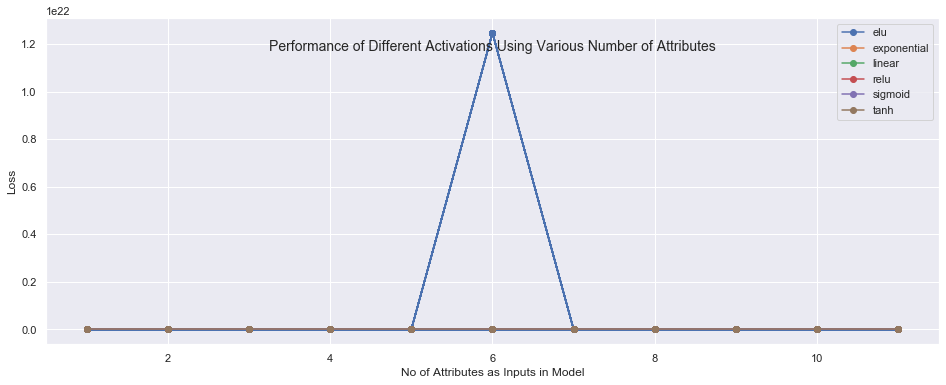

In [73]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby(["activation"])

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for activation, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=activation)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Activations Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

Text(0.5, 0.9, 'Performance of Different Optimiser Using Various Number of Attributes')

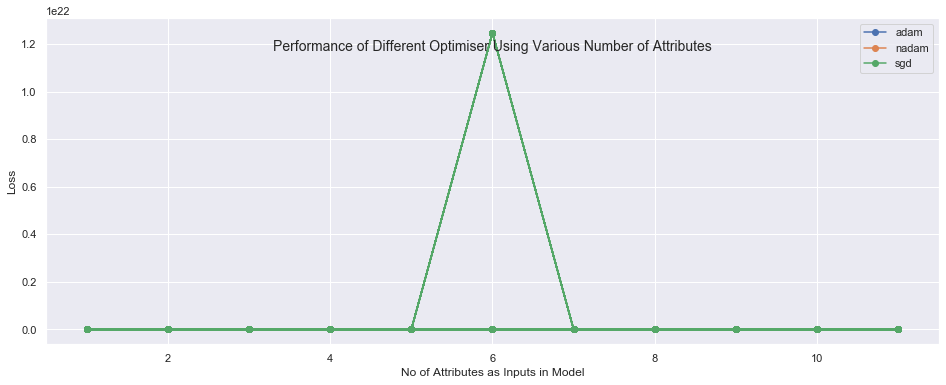

In [74]:
# Plot the actvations to see which performed best
plt.rcParams["figure.figsize"] = [16, 6]
groups = df.groupby('optimiser')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for optimiser, group in groups:
    ax.plot(group["no_attrib"], group["loss"], marker='.', linestyle='-', ms=12, label=optimiser)
ax.legend()
ax.set_ylabel("Loss")
ax.set_xlabel("No of Attributes as Inputs in Model")
ax.text(.5,.9,"Performance of Different Optimiser Using Various Number of Attributes", horizontalalignment='center',transform=ax.transAxes,fontsize=14)

In [75]:
# Sort the various model iterations according to loss to determine the best model(s) to chose) 
df.sort_values(by='loss', ascending=True)

,no_attrib,scaling,test_size,activation,optimiser,no_epochs,batch_size,loss
4848,9,False,0.3,sigmoid,sgd,100,10,7.532524
4188,9,False,0.3,sigmoid,sgd,100,10,7.532524
3594,9,False,0.3,sigmoid,sgd,100,10,7.532524
439,11,True,0.3,exponential,nadam,100,10,8.280677
580,9,True,0.3,elu,nadam,100,10,8.297373
712,9,True,0.3,elu,nadam,100,10,8.297373
514,9,True,0.3,elu,nadam,100,10,8.297373
570,10,True,0.3,exponential,nadam,100,10,8.620350
504,10,True,0.3,exponential,nadam,100,10,8.620350
702,10,True,0.3,exponential,nadam,100,10,8.620350
